In [3]:
import numpy as np
import os
import pandas as pd
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
path_to_files = '/Users/gohitha/Desktop/CPSIL/sepsis-prediction/physionet.org/files/challenge-2019/1.0.0/training/training_setB'

In [4]:
all_files = [os.path.join(path_to_files, filename) for filename in os.listdir(path_to_files) if filename.endswith('.psv')]
df_list = [pd.read_csv(file, delimiter='|') for file in all_files]

In [6]:
# split data into positives and negatives
def split_data(path):
    negatives = []
    positives = []
    for df in df_list:
        if 1 in np.array(df['SepsisLabel']):
            positives.append(df)
        else:
            negatives.append(df)
    return (pd.concat(negatives, ignore_index=True), pd.concat(positives, ignore_index=True))

In [9]:
neg, pos = split_data(path_to_files)

In [44]:
def plot_dataset(columns, data, n_cols):  
    # Define the size of the grid
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the required number of rows

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 3))  # Adjust the size as needed

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot a histogram on each subplot
    for ax, column in zip(axes, columns):
        ax.hist(data[column].dropna(), bins=30, alpha=0.7, color='blue')  # Drop NA for clean histogram plotting
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # Hide any unused subplots if you have an uneven number of columns
    for ax in axes[len(columns):]:
        ax.axis('off')

    # Adjust layout to prevent overlap
    fig.tight_layout()

    # Display the plot
    plt.show()


In [12]:
pos['HospAdmTime'] = pos['HospAdmTime'] * -1
neg['HospAdmTime'] = neg['HospAdmTime'] * -1

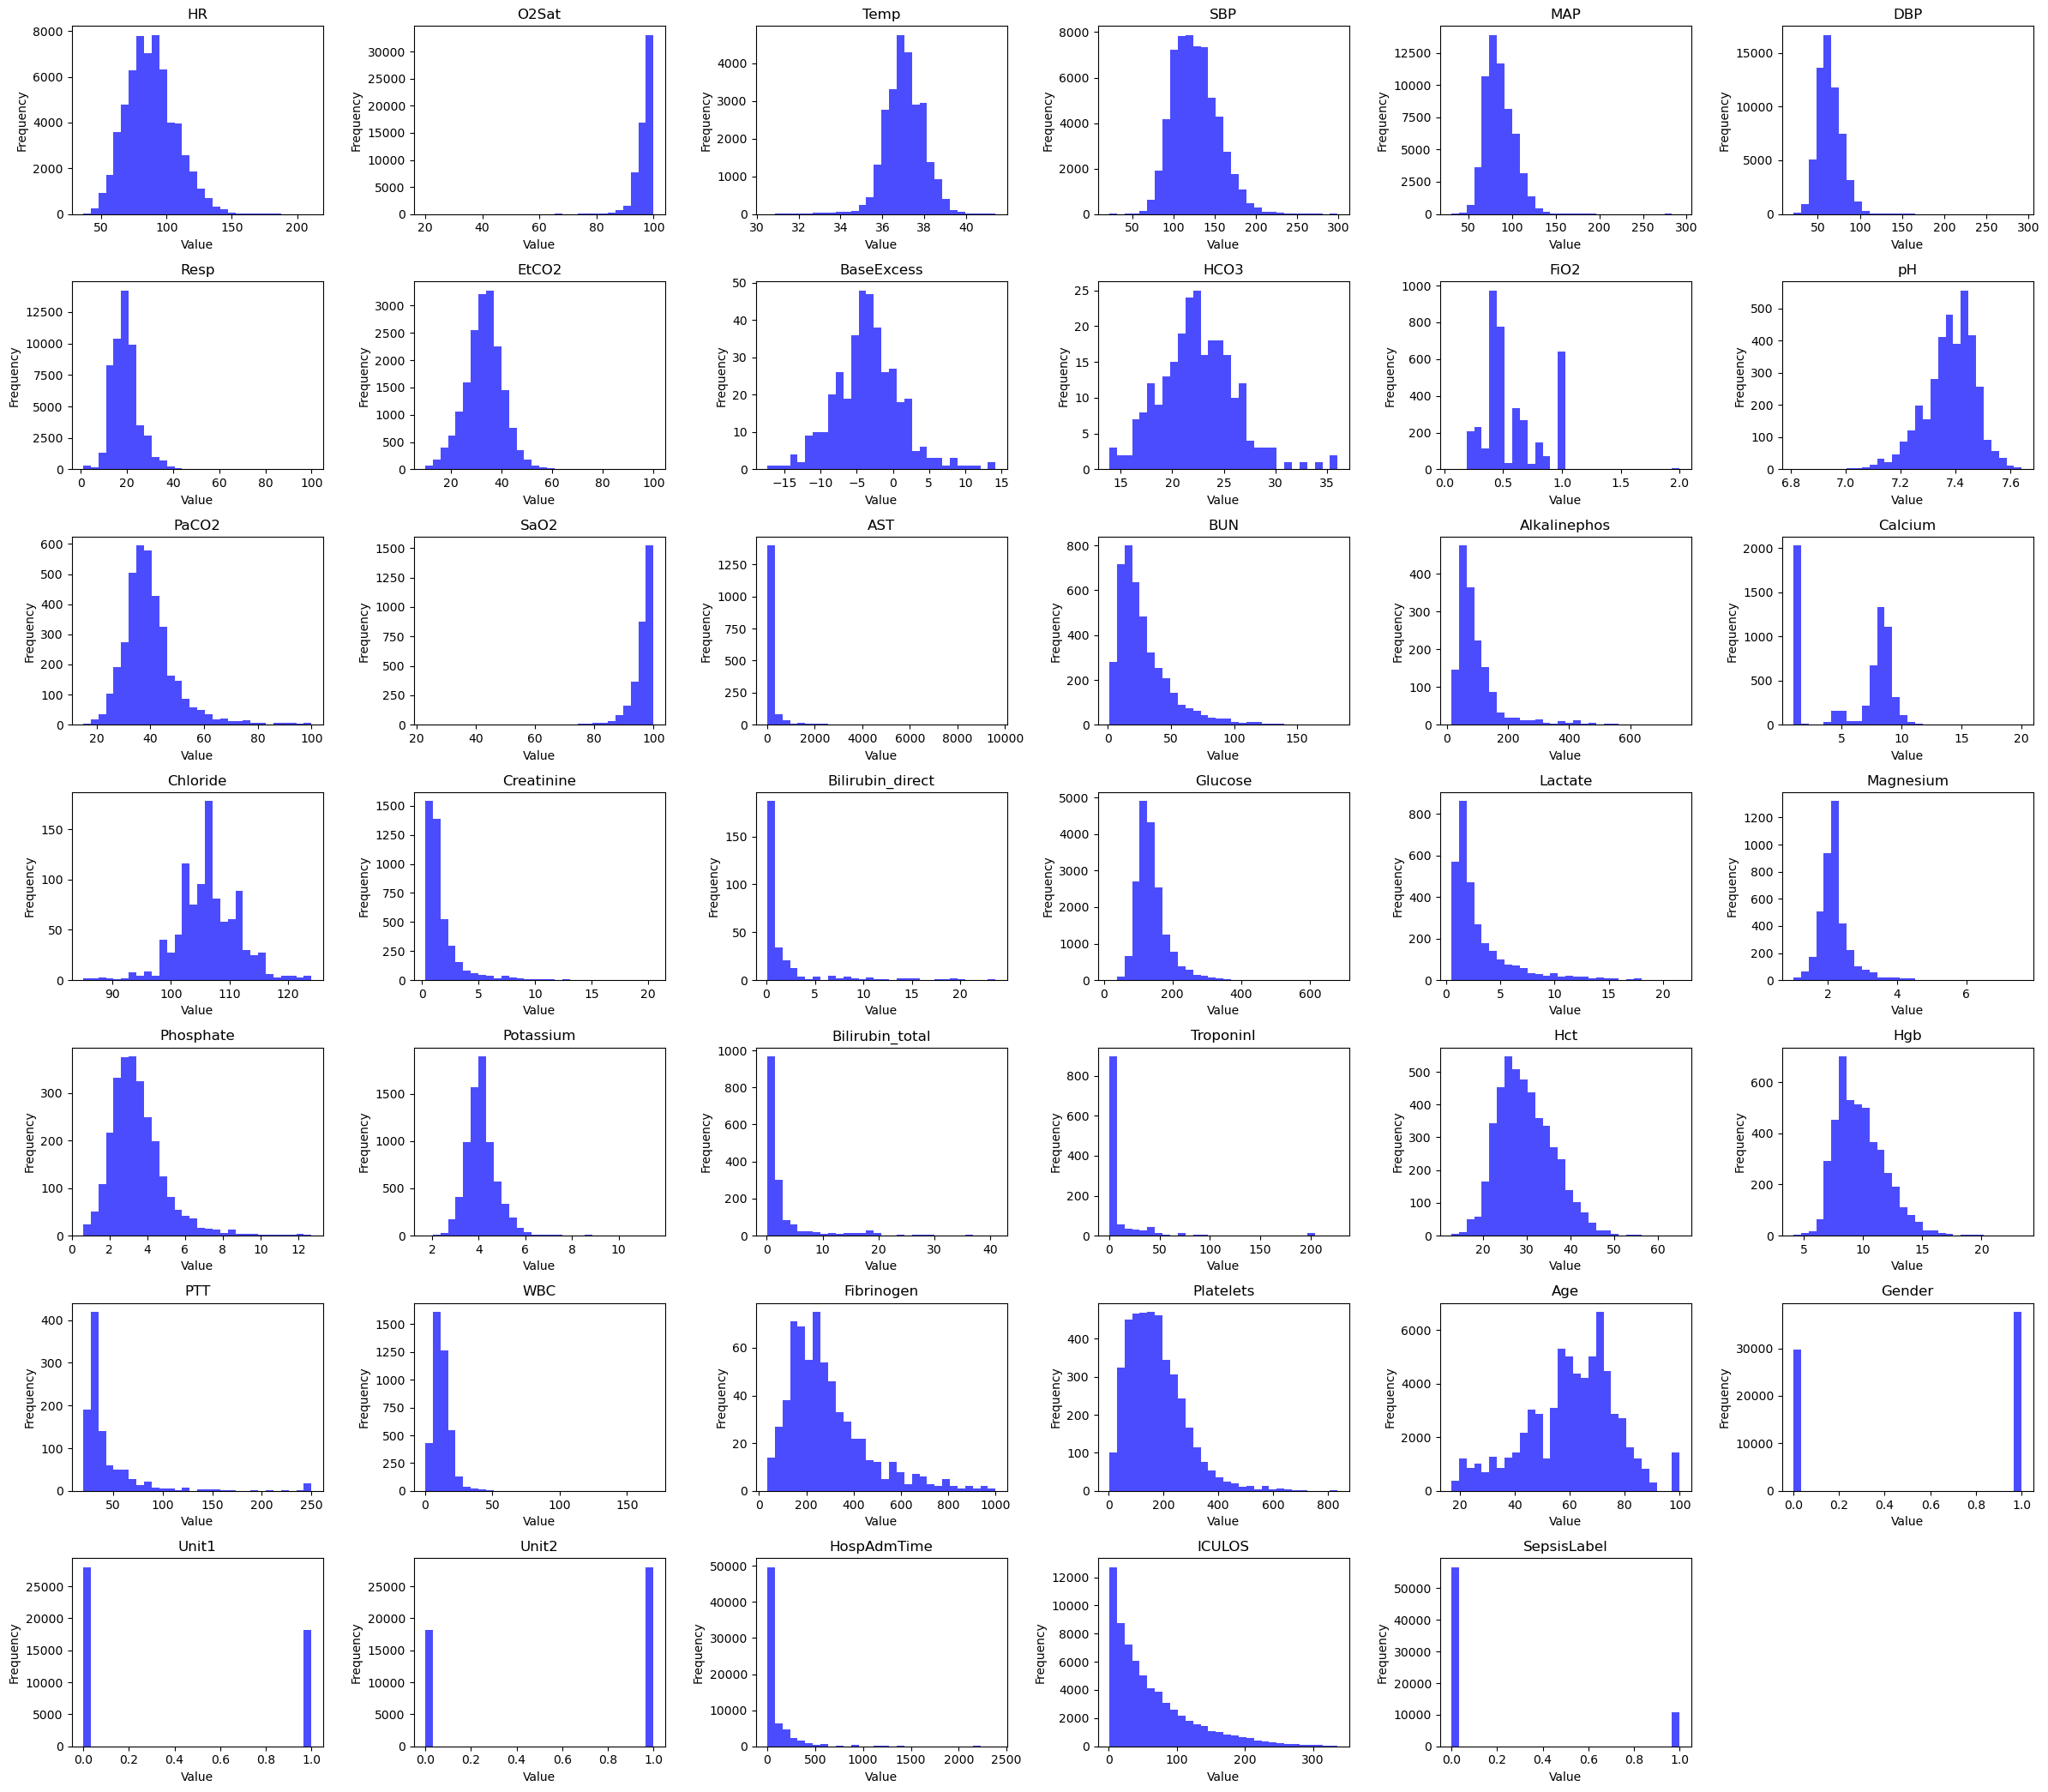

In [114]:
plot_dataset(pos.columns, pos, 6)

In [13]:
pos_skewness = pos.skew()
pos_skew = list(pos_skewness[pos_skewness.abs() > 1.2].index)

In [116]:
pos_skew

['O2Sat',
 'DBP',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [14]:
pos_skew.remove('O2Sat')
pos_skew.remove('SaO2')
pos_skew.remove('SepsisLabel')

In [118]:
pos_skew

['DBP',
 'PaCO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'HospAdmTime',
 'ICULOS']

In [15]:
neg_skewness = neg.skew()
neg_skew = list(neg_skewness[neg_skewness.abs() > 1.5].index)

In [16]:
neg_skew.remove('O2Sat')
neg_skew.remove('SaO2')

In [121]:
neg_skew

['FiO2',
 'PaCO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'HospAdmTime',
 'ICULOS']

In [17]:
for col in pos_skew:
    pos[col] = pos[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)
for col in neg_skew:
    neg[col] = neg[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)

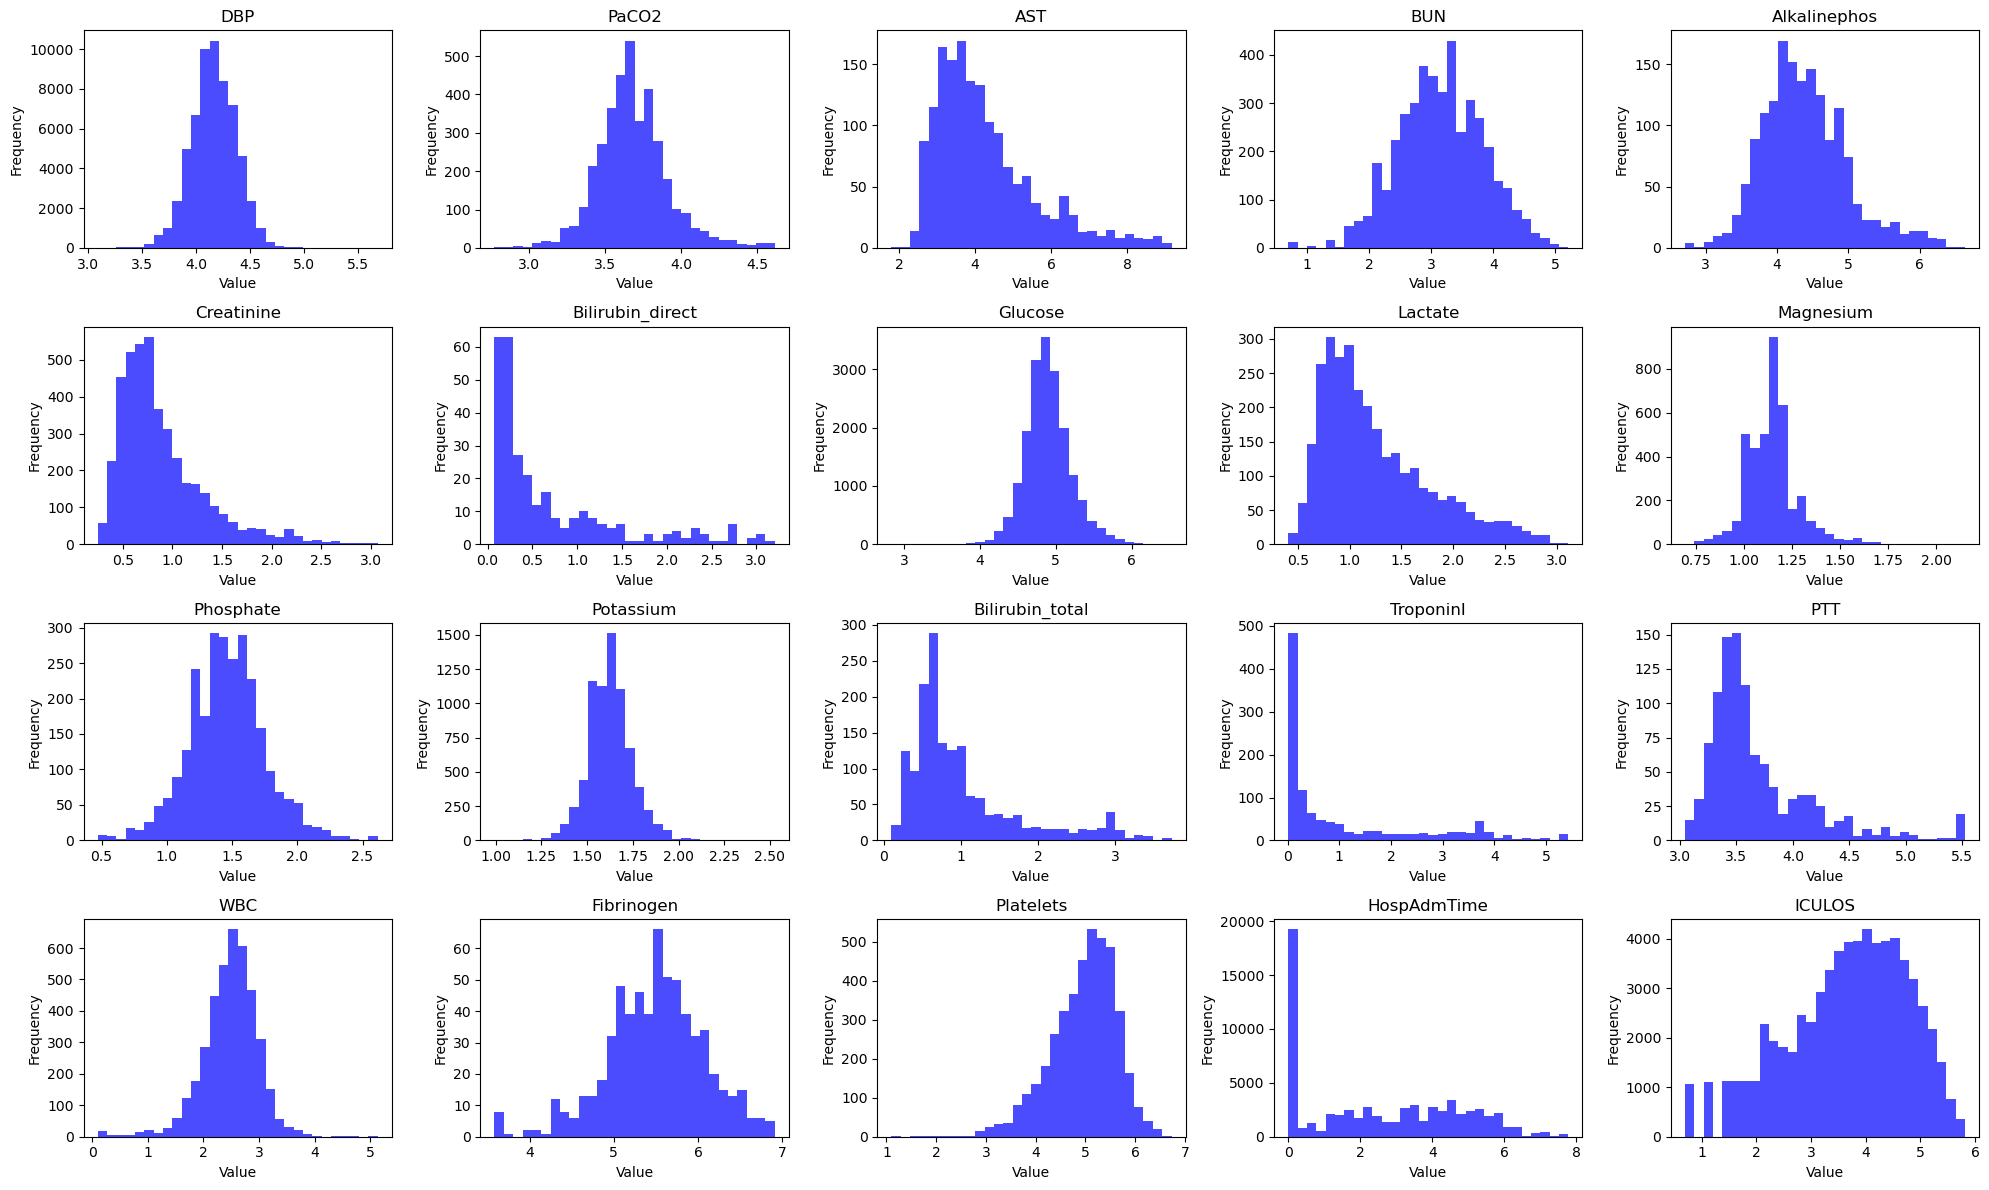

In [125]:
plot_dataset(pos_skew, pos, 5)

In [18]:
new_pos_skewness = pos.skew()
pos_still_skew = list(new_pos_skewness[new_pos_skewness.abs() > 1.2].index)

In [19]:
pos_still_skew.remove('O2Sat')
pos_still_skew.remove('SaO2')
pos_still_skew.remove('SepsisLabel')

In [128]:
pos_still_skew

['AST',
 'Creatinine',
 'Bilirubin_direct',
 'Bilirubin_total',
 'TroponinI',
 'PTT']

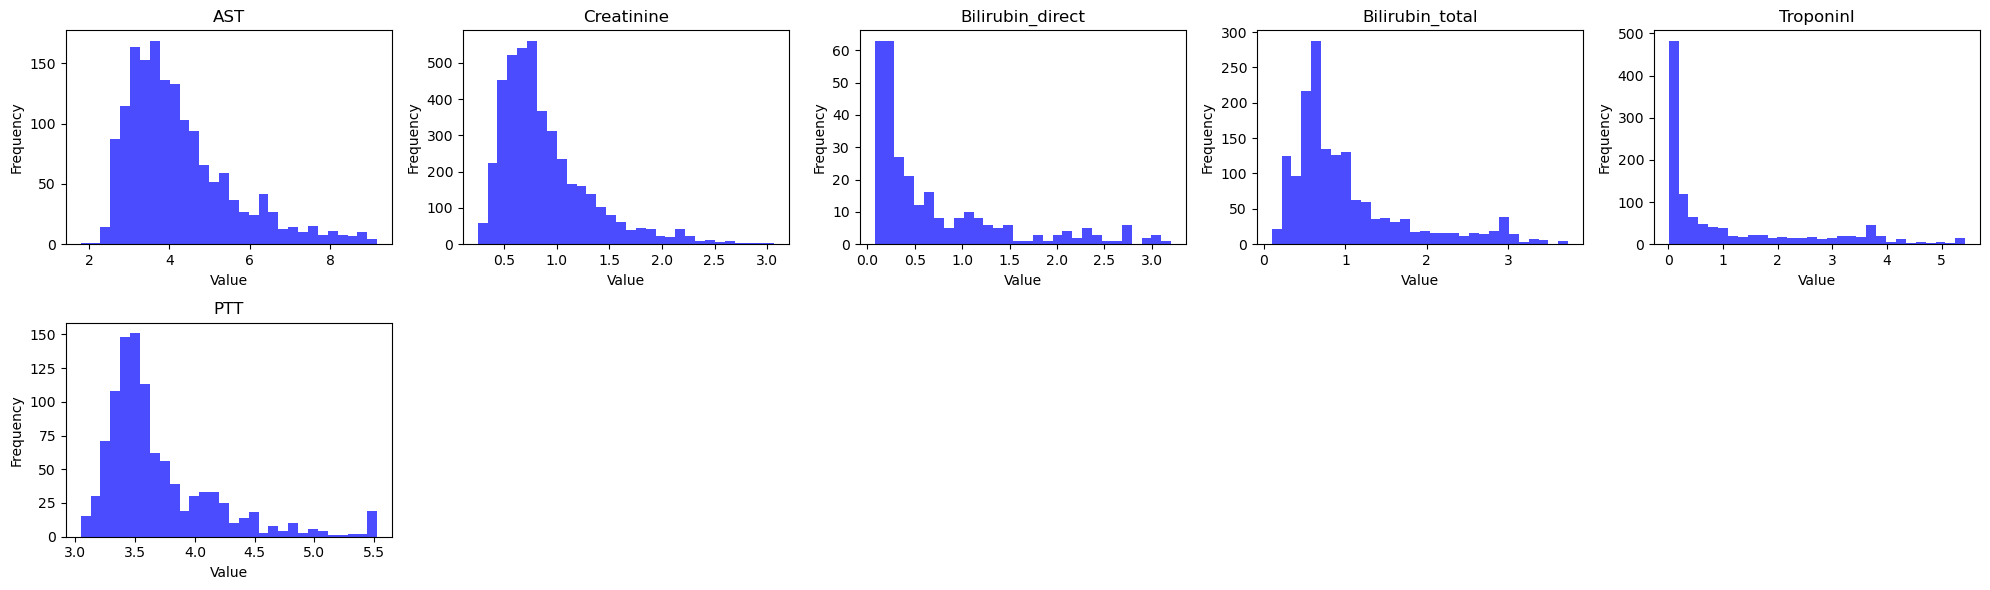

In [130]:
plot_dataset(pos_still_skew, pos, 5)

In [20]:
for col in pos_still_skew:
    pos[col] = pos[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)

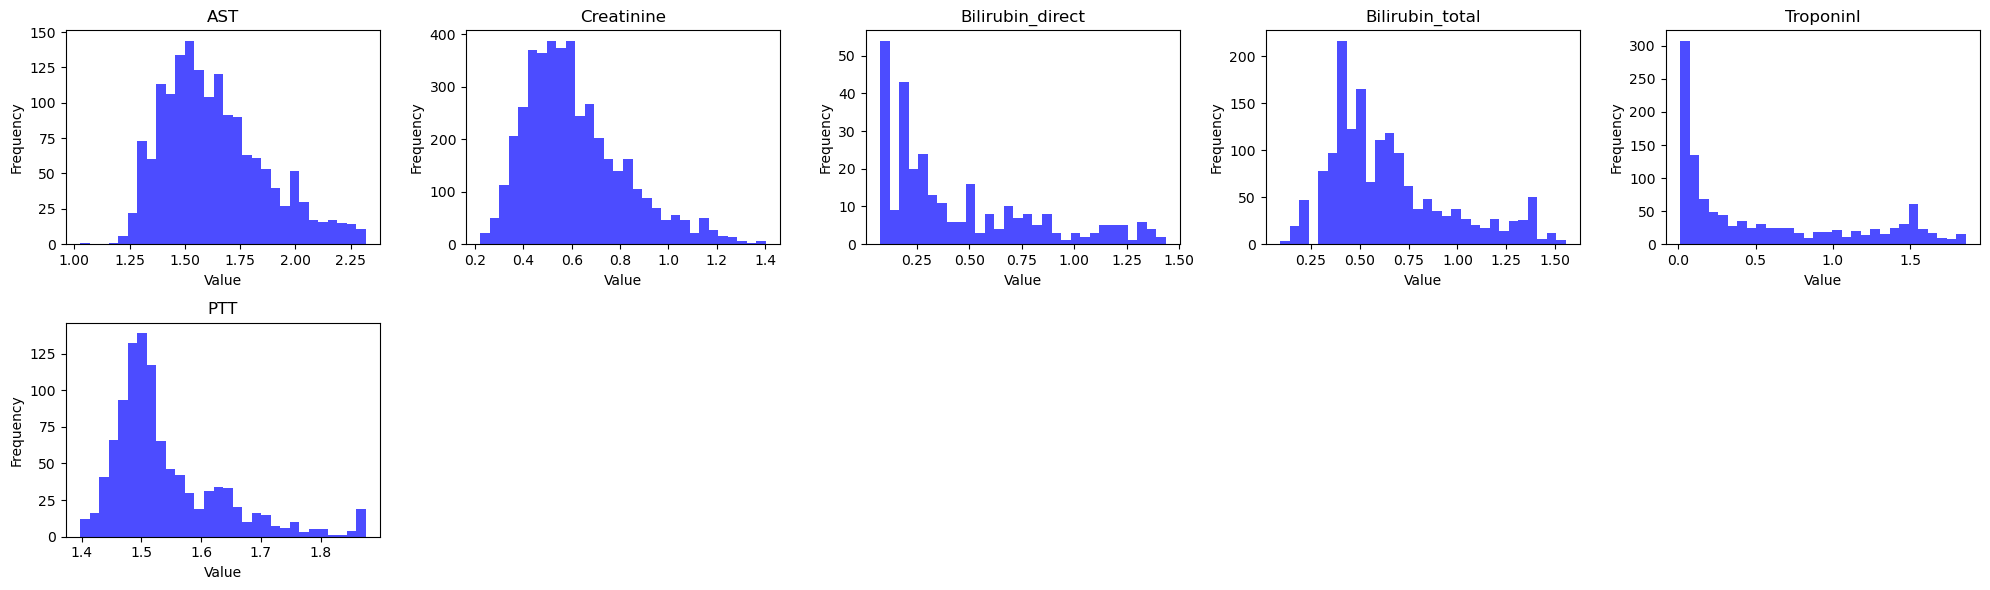

In [132]:
plot_dataset(pos_still_skew, pos, 5)

In [133]:
pos.skew()

HR                  0.466607
O2Sat              -3.502184
Temp               -0.453261
SBP                 0.500921
MAP                 1.099342
DBP                -0.033217
Resp                0.919392
EtCO2               0.396594
BaseExcess          0.334411
HCO3                0.444151
FiO2                0.860731
pH                 -0.866902
PaCO2               0.539041
SaO2               -4.939902
AST                 0.699733
BUN                -0.110751
Alkalinephos        0.638277
Calcium            -0.364473
Chloride           -0.175714
Creatinine          0.918632
Bilirubin_direct    1.038253
Glucose             0.360318
Lactate             1.016111
Magnesium           1.017167
Phosphate           0.140854
Potassium           0.478874
Bilirubin_total     0.967440
TroponinI           0.807173
Hct                 0.514419
Hgb                 0.899186
PTT                 1.514563
WBC                -0.722371
Fibrinogen         -0.392036
Platelets          -0.809344
Age           

In [134]:
neg.skew()

HR                  0.437254
O2Sat              -3.762971
Temp               -0.212309
SBP                 0.498099
MAP                 0.992960
DBP                 1.039263
Resp                1.123130
EtCO2               0.526966
BaseExcess         -0.726896
HCO3               -0.414791
FiO2                9.641687
pH                 -0.961166
PaCO2               0.471070
SaO2               -4.752175
AST                 1.707737
BUN                 0.298917
Alkalinephos        1.008438
Calcium            -1.104733
Chloride           -0.929773
Creatinine          2.131085
Bilirubin_direct    2.806085
Glucose             0.599952
Lactate             1.134961
Magnesium           0.904550
Phosphate           0.156471
Potassium           0.635927
Bilirubin_total     2.559028
TroponinI           1.537945
Hct                 0.317744
Hgb                 0.573643
PTT                 2.128581
WBC                 0.162143
Fibrinogen         -0.273246
Platelets          -0.922997
Age           

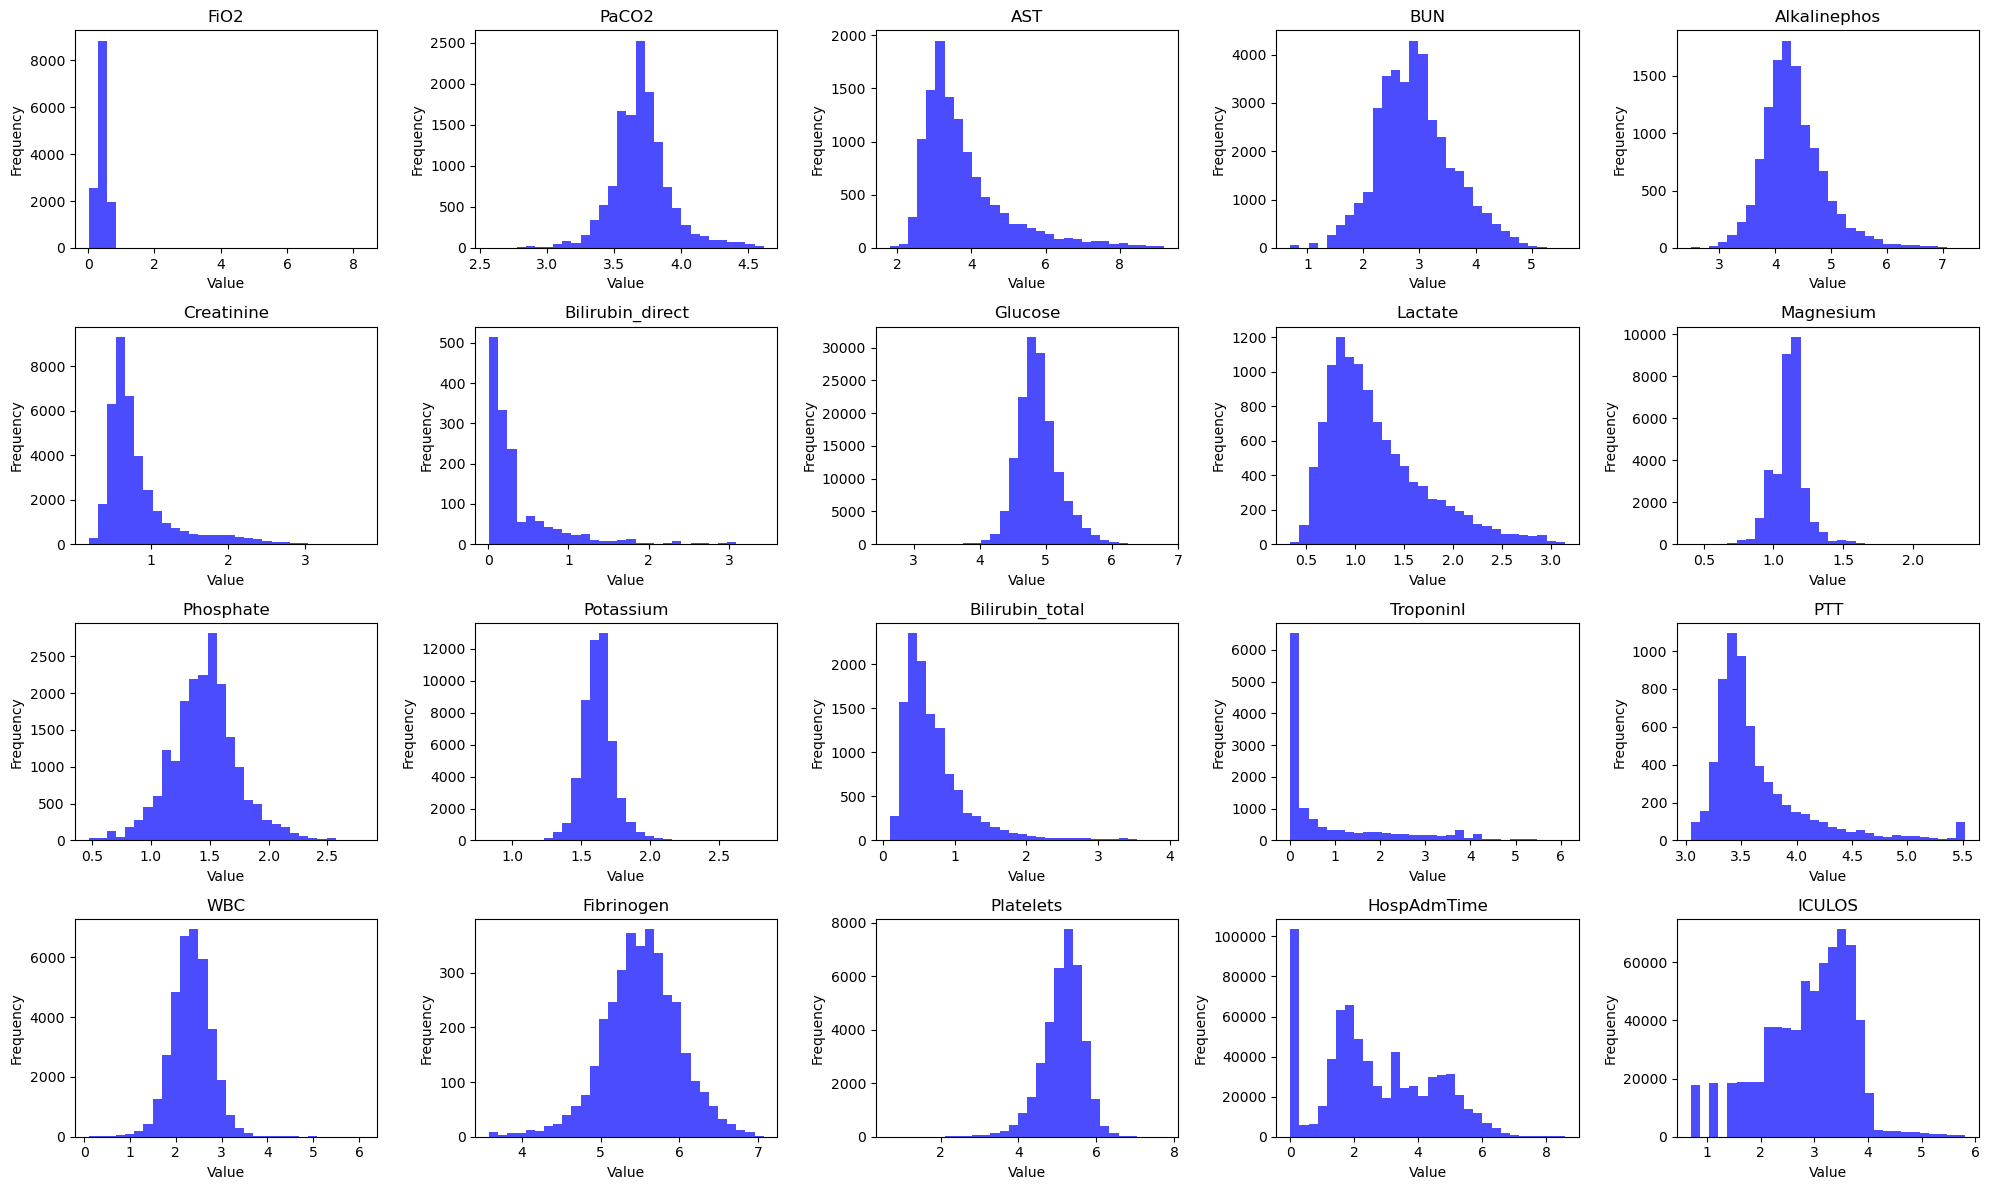

In [135]:
plot_dataset(neg_skew, neg, 5)

In [21]:
new_neg_skewness = neg.skew()
neg_still_skew = list(new_neg_skewness[new_neg_skewness.abs() > 1.2].index)

In [22]:
neg_still_skew.remove('O2Sat')
neg_still_skew.remove('SaO2')

In [139]:
neg_still_skew

['FiO2',
 'AST',
 'Creatinine',
 'Bilirubin_direct',
 'Bilirubin_total',
 'TroponinI',
 'PTT']

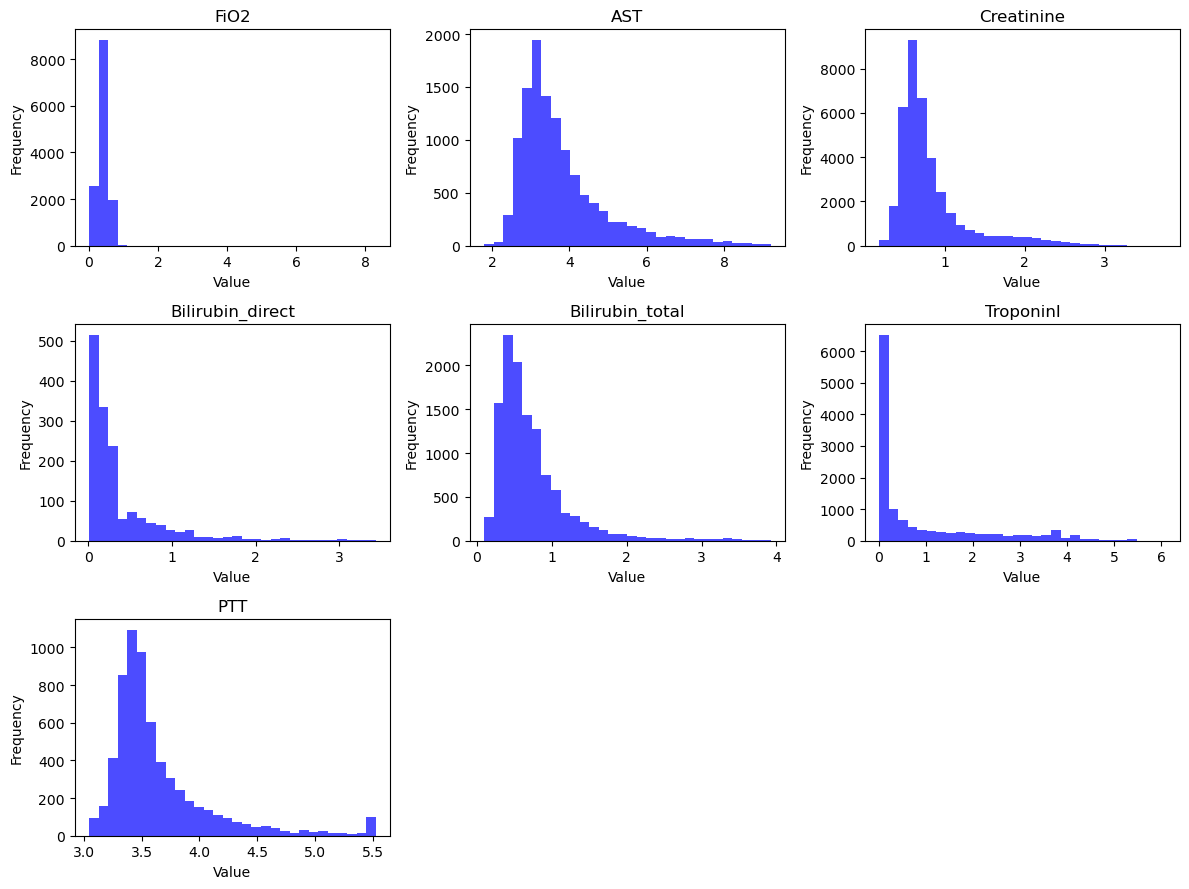

In [140]:
plot_dataset(neg_still_skew, neg, 3)

In [23]:
for col in neg_still_skew:
    neg[col] = neg[col].apply(lambda x: np.log(x+1) if pd.notnull(x) else x)

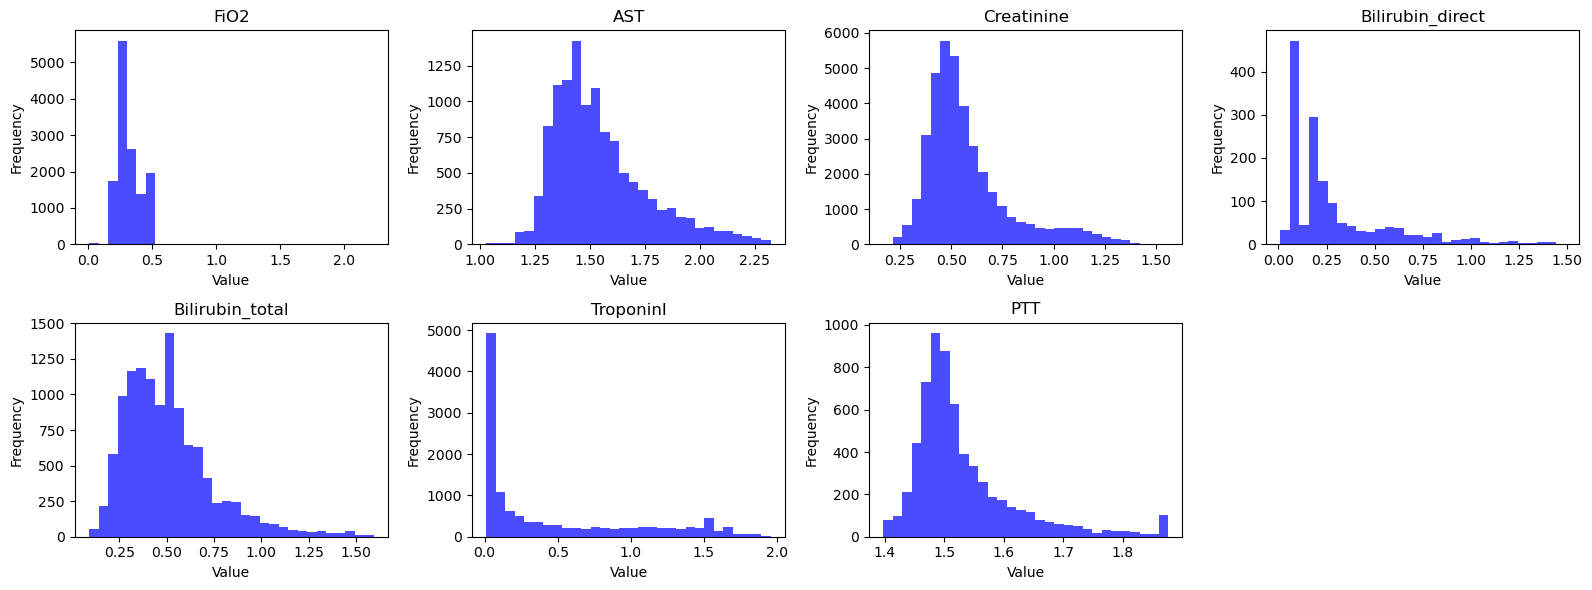

In [142]:
plot_dataset(neg_still_skew, neg, 4)

In [143]:
neg[neg_still_skew].skew()

FiO2                1.091925
AST                 1.079872
Creatinine          1.500628
Bilirubin_direct    1.844976
Bilirubin_total     1.417104
TroponinI           0.990380
PTT                 1.805458
dtype: float64

In [144]:
pos[pos_still_skew].skew()

AST                 0.699733
Creatinine          0.918632
Bilirubin_direct    1.038253
Bilirubin_total     0.967440
TroponinI           0.807173
PTT                 1.514563
dtype: float64

In [24]:
def custom_impute(column):
    # Convert the series to a numpy array for easier manipulation
    values = column.values
    mean_value = np.nanmean(values)  # Compute mean ignoring NaN
    
    # Identify the index of the first non-NaN value
    first_valid_index = column.first_valid_index()
    
    # If the first entry itself is NaN, we need to handle initial NaN values
    if first_valid_index is not None:
        # Fill NaN values up to the first valid index with the mean
        values[:first_valid_index] = np.where(np.isnan(values[:first_valid_index]), mean_value, values[:first_valid_index])
        
    # Create a Series from the values to utilize pandas' fillna method for forward filling
    return pd.Series(values, index=column.index).fillna(method='ffill')

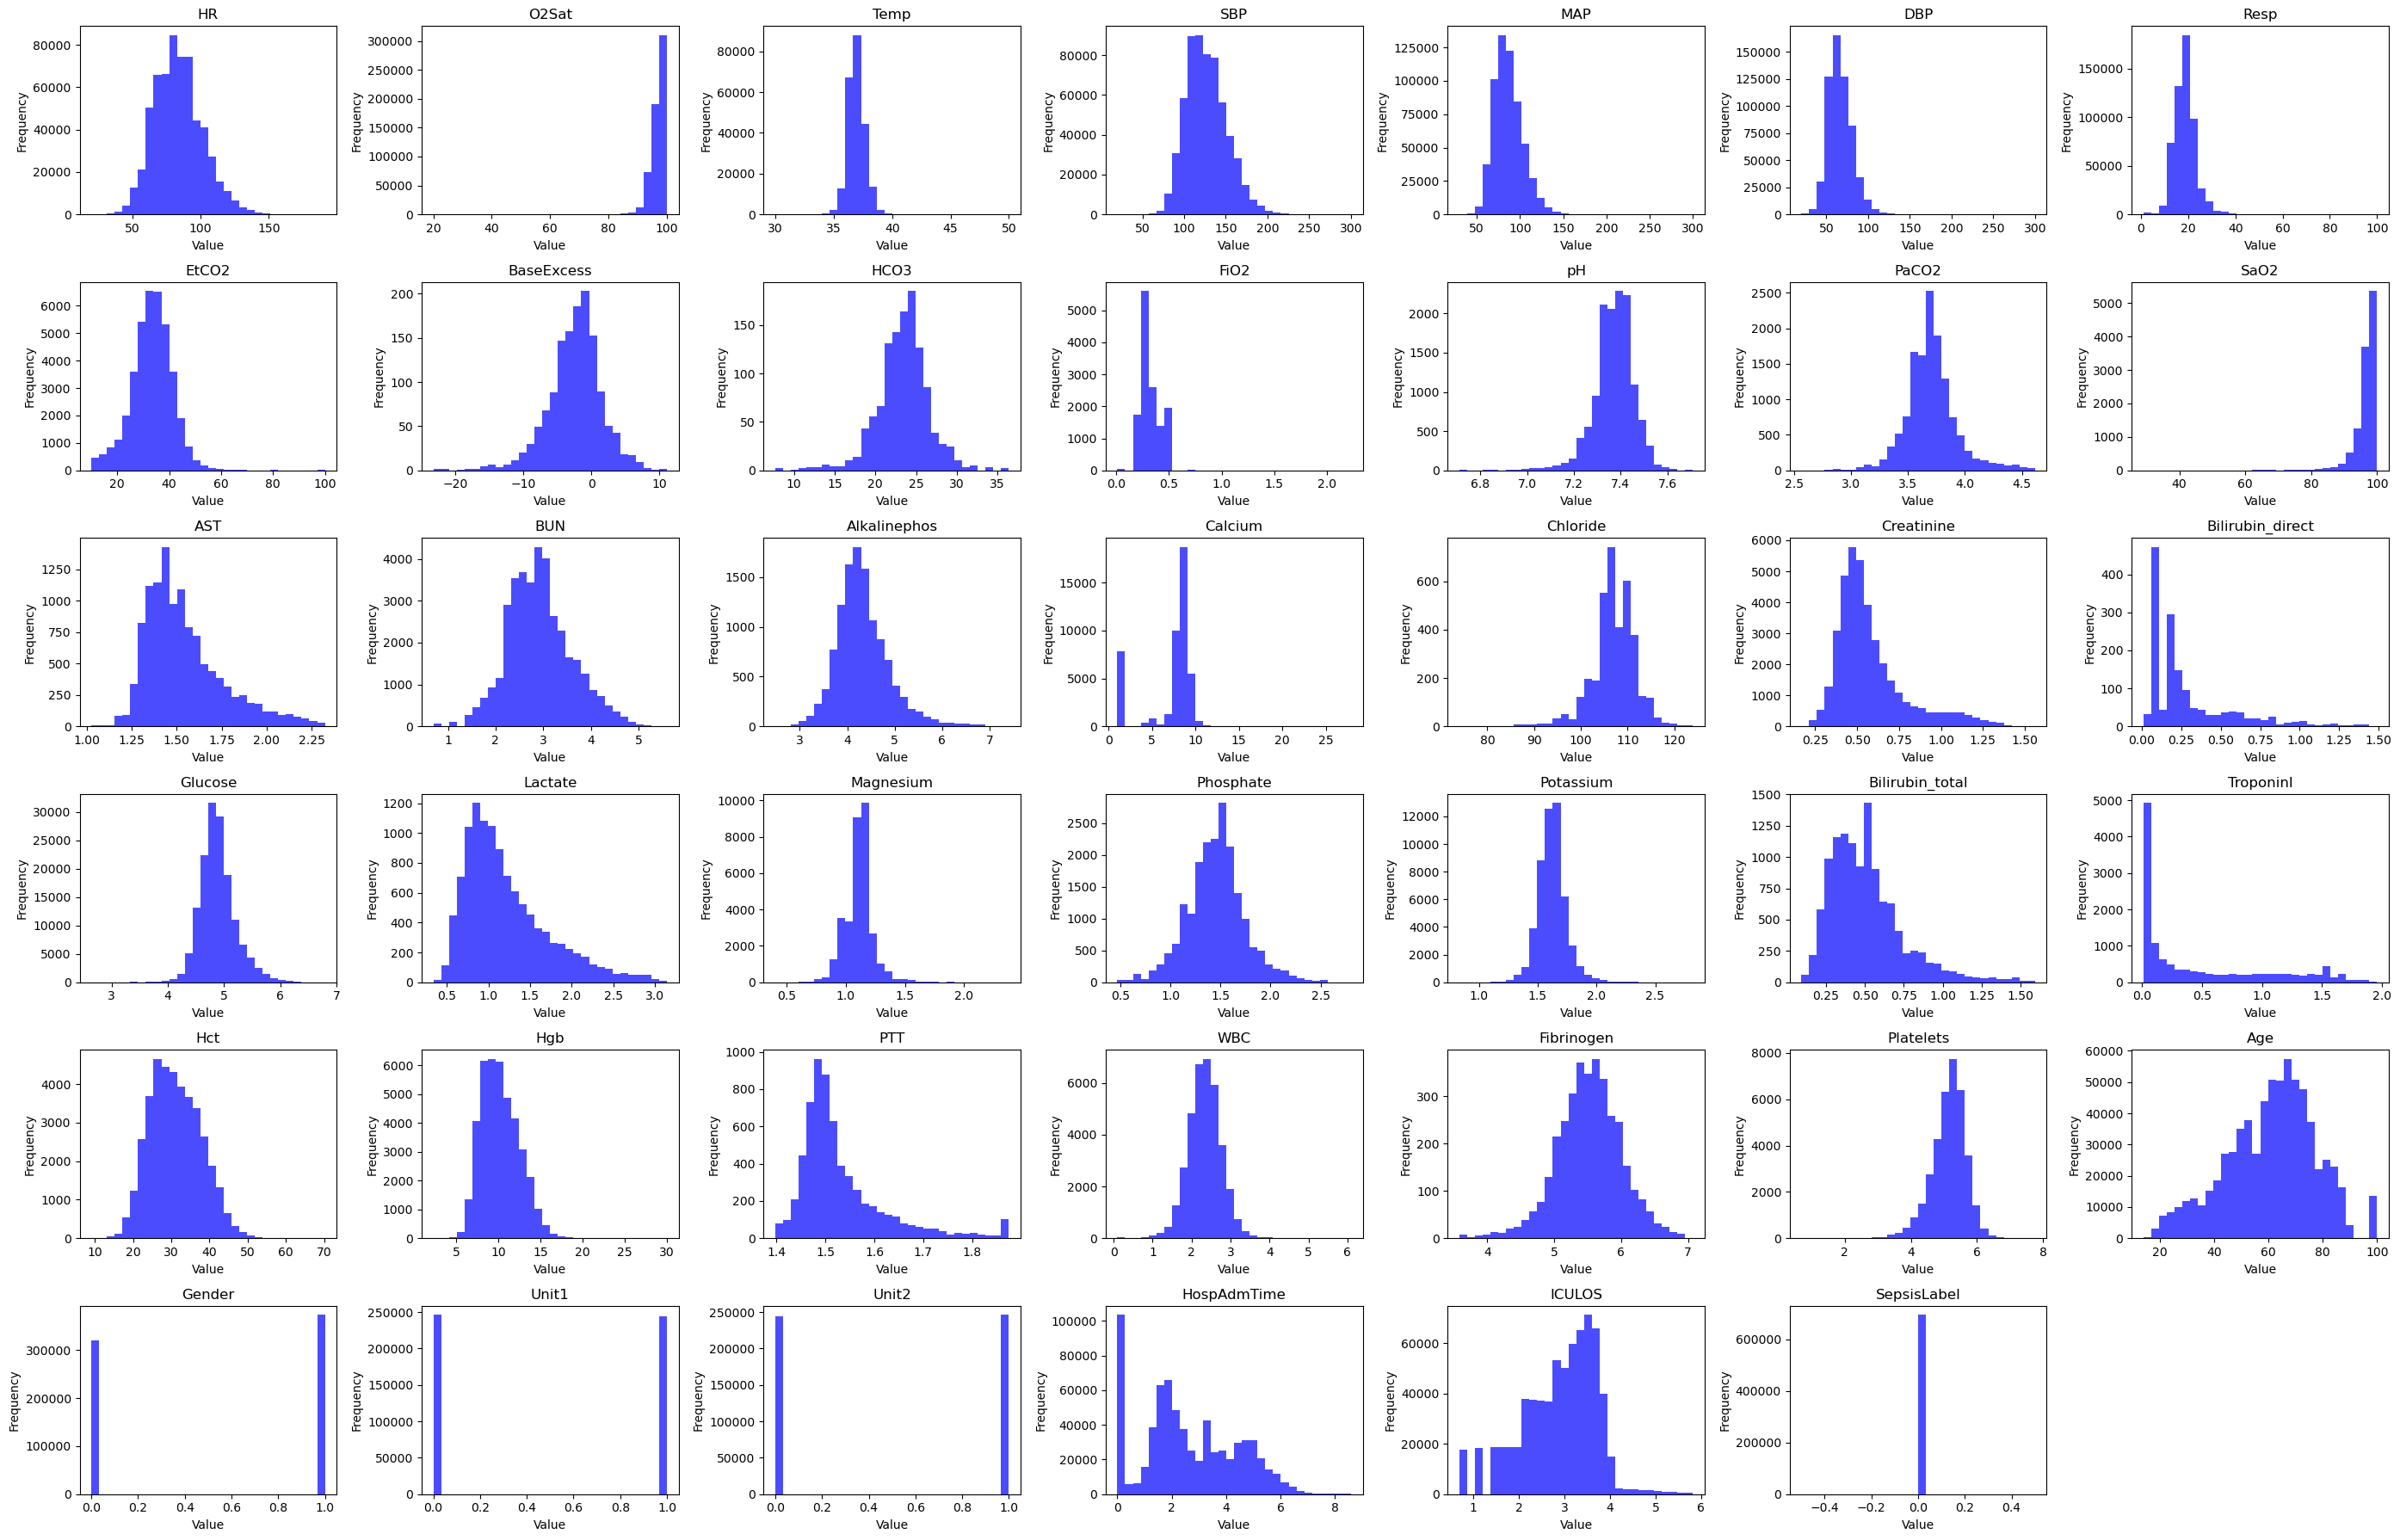

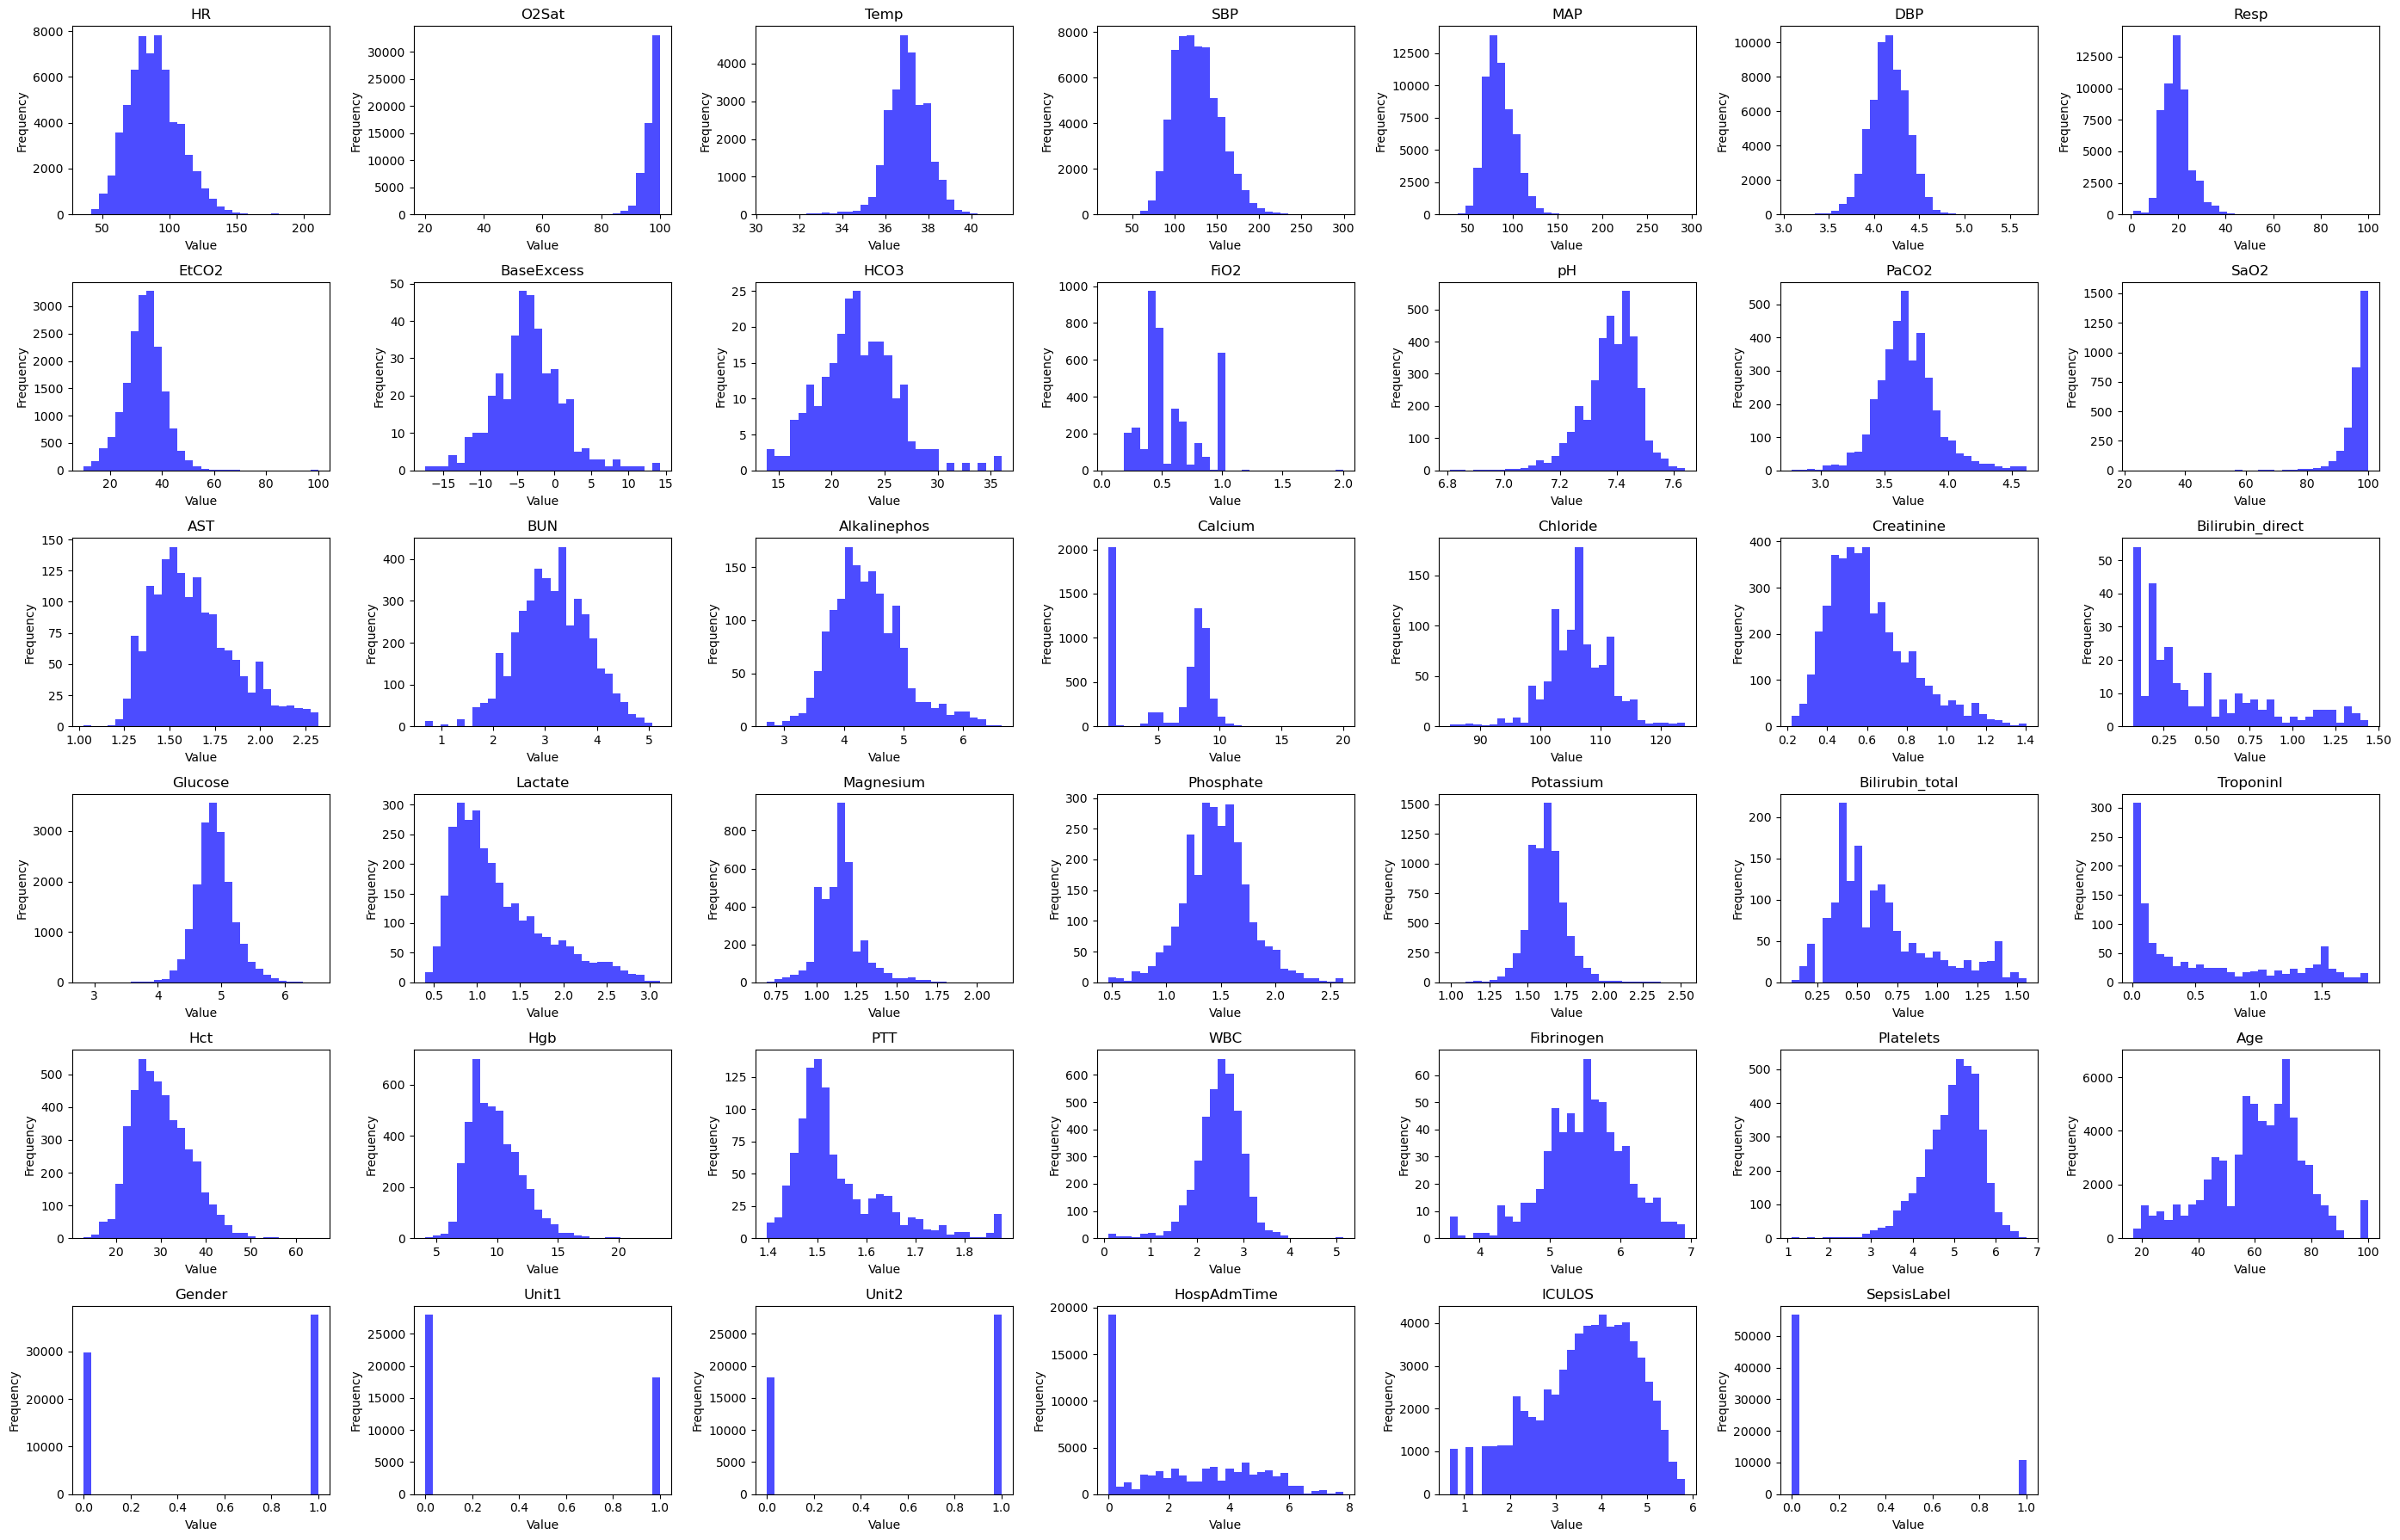

In [147]:
plot_dataset(neg.columns, neg, 7)
plot_dataset(pos.columns, pos, 7)

In [25]:
non_demo = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']
demo = ['Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel']

In [26]:
for column in non_demo:
    pos[column] = custom_impute(pos[column])
    neg[column] = custom_impute(neg[column])

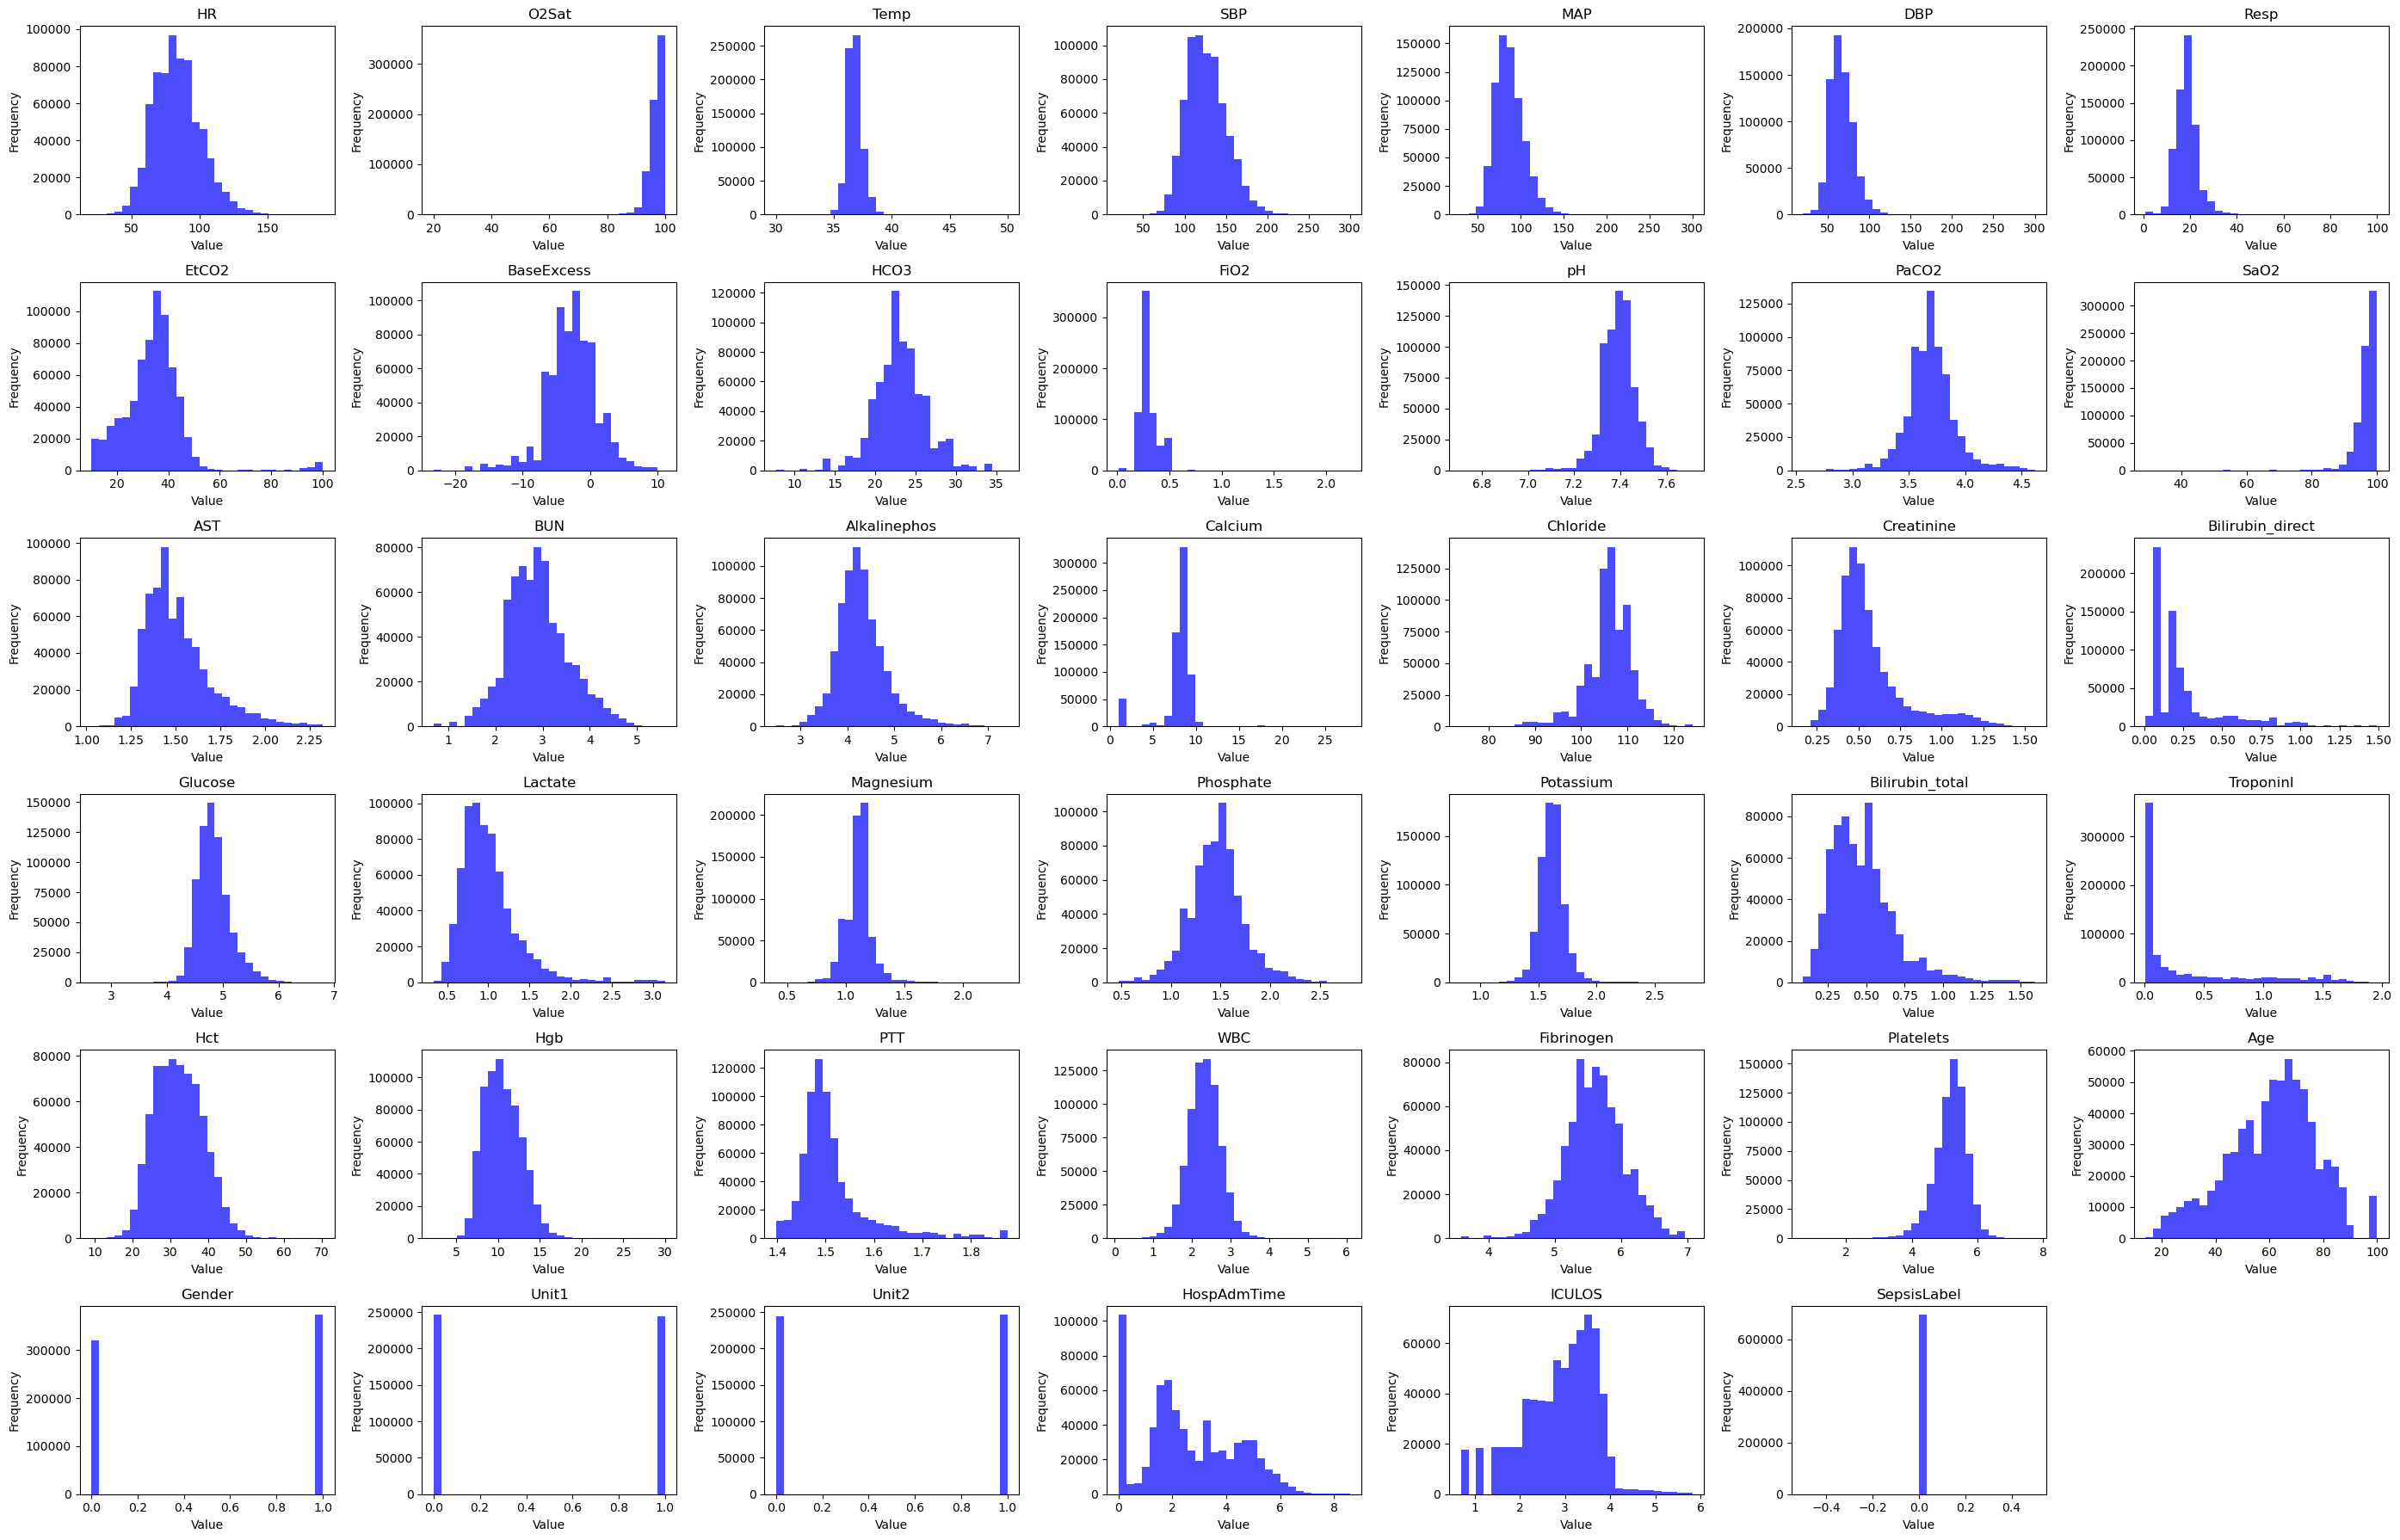

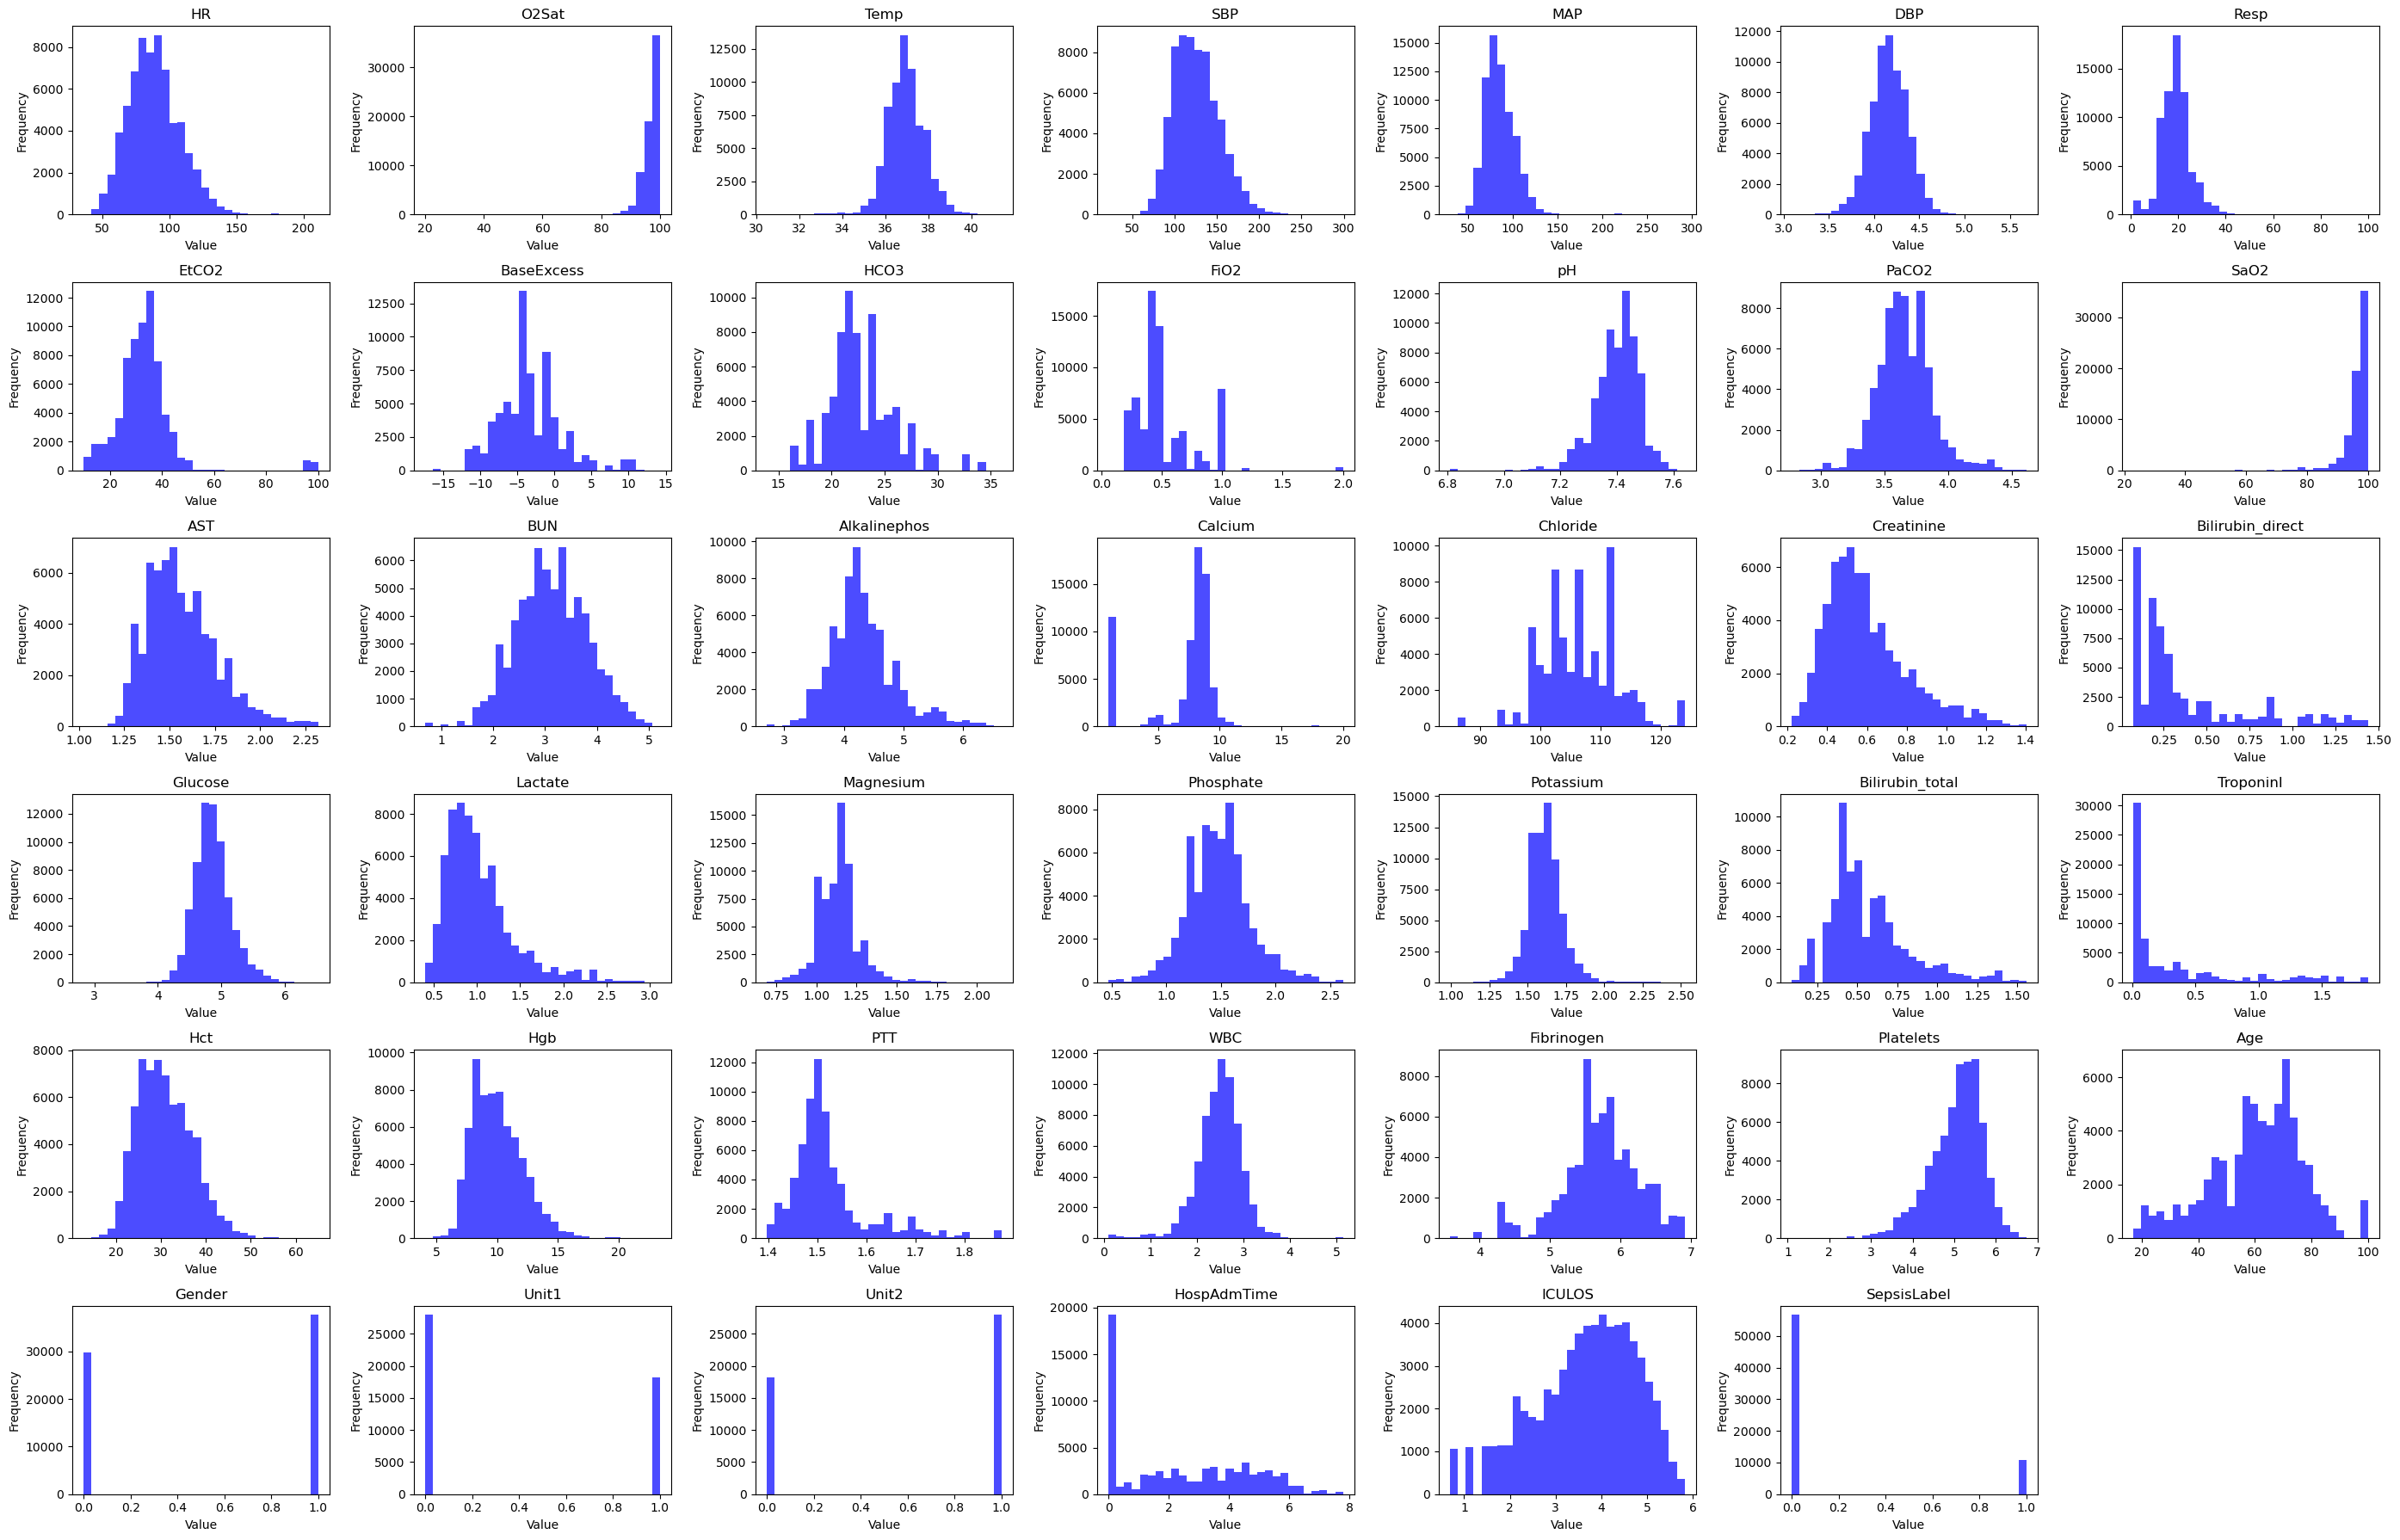

In [28]:
plot_dataset(neg.columns, neg, 7)
plot_dataset(pos.columns, pos, 7)

In [27]:
labvals = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total','Hct', 'Hgb', 'PTT', 'WBC','Platelets']
vitals = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']
demo.remove('SepsisLabel')

In [29]:
def differential_features(dataset, columns):
    temp_data = np.array(dataset)
    for column in columns:
        data = np.array(dataset[column])
        nanpos = np.where(~np.isnan(data))[0]
        diff = data.copy().astype(float)
        if len(nanpos) <= 1:
            diff[:] = np.nan
            temp_data = np.column_stack((temp_data, diff))
        else:
            diff[:nanpos[1]] = np.nan
            for p in range (1, len(nanpos)-1):
                diff[nanpos[p] : nanpos[p+1]] = data[nanpos[p]] - data[nanpos[p-1]]
            diff[nanpos[-1]:] = data[nanpos[-1]] - data[nanpos[-2]]
            temp_data = np.column_stack((temp_data, diff))
    return temp_data

In [30]:
def slide_window(data_arr, col_idx):
    """
    Calculate dynamic statistics in a six-hour sliding window
    :param data_arr: data after using a forward-filling strategy
    :param col_idx: selected features
    :return: time-series features
    """
    data = data_arr[:, col_idx]
    max_values = [[0 for col in range(len(data))]
                  for row in range(len(col_idx))]
    min_values = [[0 for col in range(len(data))]
                  for row in range(len(col_idx))]
    mean_values = [[0 for col in range(len(data))]
                   for row in range(len(col_idx))]
    median_values = [[0 for col in range(len(data))]
                   for row in range(len(col_idx))]
    std_values = [[0 for col in range(len(data))]
                   for row in range(len(col_idx))]
    diff_std_values = [[0 for col in range(len(data))]
                   for row in range(len(col_idx))]

    for i in range(len(data)):
        if i < 6:
            win_data = data[0:i + 1]
            for ii in range(6 - i):
                win_data = np.row_stack((win_data, data[i]))
        else:
            win_data = data[i - 6: i + 1]

        for j in range(len(col_idx)):
            dat = win_data[:, j]
            if len(np.where(~np.isnan(dat))[0]) == 0:
                max_values[j][i] = np.nan
                min_values[j][i] = np.nan
                mean_values[j][i] = np.nan
                median_values[j][i] = np.nan
                std_values[j][i] = np.nan
                diff_std_values[j][i] = np.nan
            else:
                max_values[j][i] = np.nanmax(dat)
                min_values[j][i] = np.nanmin(dat)
                mean_values[j][i] = np.nanmean(dat)
                median_values[j][i] = np.nanmedian(dat)
                std_values[j][i] = np.nanstd(dat)
                diff_std_values[j][i] = np.std(np.diff(dat))

    win_features = list(chain(max_values, min_values, mean_values,
                              median_values, std_values, diff_std_values))
    win_features = (np.array(win_features)).T

    return win_features

In [31]:
def feature_extract(dataset):
    labels = np.array(dataset['SepsisLabel'])
    data_prime = dataset.drop(columns=['Bilirubin_direct', 'TroponinI', 'Fibrinogen', 'SepsisLabel'])
    # obtain np array of dataset stacked with differential features
    data_with_diff = differential_features(data_prime, vitals + labvals)
    # 6 hour sliding window for ['HR', 'O2Sat', 'SBP', 'MAP', 'Resp'] = [0, 1, 3, 4, 6] in vitals
    print(data_with_diff.shape)
    # data_slide_win = slide_window(data_with_diff, [0, 1, 3, 4, 6])
    # features = np.column_stack((data_with_diff, data_slide_win))
    features = data_with_diff
    return features, labels

In [32]:
def process_data(dataset):
    features, labels = feature_extract(dataset)
    index = [i for i in range(len(labels))]
    np.random.shuffle(index)
    features = features[index]
    labels = labels[index]
    return features, labels

In [33]:
train_neg, test_neg = train_test_split(neg, test_size=0.15, random_state=42)
train_pos, test_pos = train_test_split(pos, test_size=0.15, random_state=42)

In [34]:
test_set = pd.concat([test_neg, test_pos], ignore_index=True)

In [35]:
!pip install xgboost

In [36]:
!pip install hyperopt

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score
import xgboost as xgb
from hyperopt import STATUS_OK, hp, fmin, tpe

In [38]:
def downsample(dataset):
    x, y = process_data(dataset)
    index_0 = np.where(y == 0)[0]
    index_1 = np.where(y == 1)[0]
    
    index = index_0[len(index_1): -1]
    x_del = np.delete(x, index, 0)
    y_del = np.delete(y, index, 0)
    index = [i for i in range(len(y_del))]
    np.random.shuffle(index)
    x_del = x_del[index]
    y_del = y_del[index]
    
    return x_del, y_del

In [39]:
 def hp_opt(x_train, y_train, x_val, y_val):
        train = xgb.DMatrix(x_train, label=y_train)
        val = xgb.DMatrix(x_val, label=y_val)
        x_val_D = xgb.DMatrix(x_val)
        
        def objective(params):
            xgb_model = xgb.train(params, dtrain=train, num_boost_round=1000, evals=[(val, 'eval')],
                                  verbose_eval=False, early_stopping_rounds=80)
            y_vd_pred = xgb_model.predict(x_val_D, iteration_range=(0, xgb_model.best_iteration+1))
            y_val_class = [0 if i <= 0.5 else 1 for i in y_vd_pred]
            
            acc = accuracy_score(y_val, y_val_class)
            loss = 1 - acc
            return {'loss' : loss, 'params' : params, 'status' : STATUS_OK}

        max_depths = [3, 4]
        learning_rates = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.15, 0.2]
        subsamples = [0.5, 0.6, 0.7, 0.8, 0.9]
        colsample_bytrees = [0.5, 0.6, 0.7, 0.8, 0.9]
        reg_alphas = [0.0, 0.005, 0.01, 0.05, 0.1]
        reg_lambdas = [0.8, 1, 1.5, 2, 4]

        space = {
            'max_depth': hp.choice('max_depth', max_depths),
            'learning_rate': hp.choice('learning_rate', learning_rates),
            'subsample': hp.choice('subsample', subsamples),
            'colsample_bytree': hp.choice('colsample_bytree', colsample_bytrees),
            'reg_alpha': hp.choice('reg_alpha', reg_alphas),
            'reg_lambda': hp.choice('reg_lambda', reg_lambdas),
        }

        best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20)

        best_param = {'max_depth': max_depths[(best['max_depth'])],
                      'learning_rate': learning_rates[(best['learning_rate'])],
                      'subsample': subsamples[(best['subsample'])],
                      'colsample_bytree': colsample_bytrees[(best['colsample_bytree'])],
                      'reg_alpha': reg_alphas[(best['reg_alpha'])],
                      'reg_lambda': reg_lambdas[(best['reg_lambda'])]
                      }

        return best_param

In [40]:
def train_model(k, x_train, y_train, x_val, y_val, save_dir):
    print('*************************************************************')
    print('{}th training ..............'.format(k + 1))
    print('Hyperparameters optimization')
    best_param = hp_opt(x_train, y_train, x_val, y_val)
    xgb_model = xgb.XGBClassifier(max_depth = best_param['max_depth'],
                                  eta = best_param['learning_rate'],
                                  n_estimators = 1000,
                                  subsample = best_param['subsample'],
                                  colsample_bytree = best_param['colsample_bytree'],
                                  reg_alpha =  best_param['reg_alpha'],
                                  reg_lambda = best_param['reg_lambda'],
                                  objective = "binary:logistic"
                                   )
    xgb_model.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric='error',
                  early_stopping_rounds=80, verbose=False)
    
    y_tr_pred = (xgb_model.predict_proba(x_train, iteration_range=(0, xgb_model.best_iteration+1)))[:,1]
    train_auc = roc_auc_score(y_train, y_tr_pred)
    print('training dataset AUC: ' + str(train_auc))
    y_tr_class = [0 if prob <= 0.5 else 1 for prob in y_tr_pred]
    acc = accuracy_score(y_train, y_tr_class)
    print('training dataset accuracy: ' + str(acc))
    
    y_vd_pred = (xgb_model.predict_proba(x_val, iteration_range=(0, xgb_model.best_iteration+1)))[:, 1]
    valid_auc = roc_auc_score(y_val, y_vd_pred)
    print('validation dataset AUC: ' + str(valid_auc))
    y_val_class = [0 if i <= 0.5 else 1 for i in y_vd_pred]
    acc = accuracy_score(y_val, y_val_class)
    print('validation dataset accuracy: ' + str(acc))
    print('************************************************************')
    
    # save the model
    save_model_path = save_dir + 'model{}.mdl'.format(k + 1)
    xgb_model.get_booster().save_model(fname=save_model_path)

In [274]:
 # 5-fold cross validation, five XGBoost models produced
kfold = KFold(n_splits=5, shuffle=True, random_state=np.random.seed(12306))
for (k, (train0_index, val0_index)), (k, (train1_index, val1_index)) in  zip(enumerate(kfold.split(train_neg)), enumerate(kfold.split(train_pos))):
        train_set = pd.concat([train_neg.iloc[train0_index], train_pos.iloc[train1_index]])
        x_train, y_train = downsample(train_set)
        val_set = pd.concat([train_neg.iloc[val0_index], train_pos.iloc[val1_index]])
        x_val, y_val = downsample(val_set)
        train_model(k, x_train, y_train, x_val, y_val, save_dir = '/Users/gohitha/Desktop/CPSIL/sepsis-prediction/models/')

(518155, 68)
(129540, 68)
*************************************************************
1th training ..............
Hyperparameters optimization
100%|████████| 20/20 [00:43<00:00,  2.18s/trial, best loss: 0.03816131830008673]


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.9998147153000064
training dataset accuracy: 0.9785344189489267
validation dataset AUC: 0.9755436835753234
validation dataset accuracy: 0.9615495808037005
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:25:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


(518156, 68)
(129539, 68)
*************************************************************
2th training ..............
Hyperparameters optimization
100%|████████| 20/20 [00:54<00:00,  2.73s/trial, best loss: 0.03724101757146603]


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.9729945370047575
training dataset accuracy: 0.9616736747776935
validation dataset AUC: 0.9693360629172579
validation dataset accuracy: 0.960923157618673
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:27:39] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


(518156, 68)
(129539, 68)
*************************************************************
3th training ..............
Hyperparameters optimization
100%|████████| 20/20 [00:48<00:00,  2.41s/trial, best loss: 0.03909409544351572]


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.9802393389735459
training dataset accuracy: 0.964273492574088
validation dataset AUC: 0.9610273699758953
validation dataset accuracy: 0.9600970612024805
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:29:16] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


(518156, 68)
(129539, 68)
*************************************************************
4th training ..............
Hyperparameters optimization
100%|████████| 20/20 [00:38<00:00,  1.93s/trial, best loss: 0.04050702672912643]


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.9748142712343325
training dataset accuracy: 0.9633108706010483
validation dataset AUC: 0.9647903815138454
validation dataset accuracy: 0.9589418572609534
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:30:40] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


(518157, 68)
(129538, 68)
*************************************************************
5th training ..............
Hyperparameters optimization
100%|████████| 20/20 [00:36<00:00,  1.82s/trial, best loss: 0.03905197953137629]


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


training dataset AUC: 0.9709026969666474
training dataset accuracy: 0.9635791059081262
validation dataset AUC: 0.9657518209291961
validation dataset accuracy: 0.9606786964718557
************************************************************


/Users/gohitha/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [22:32:00] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [275]:
test_set

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,67.0,90.0,38.3,103.0,74.0,58.000000,15.0,26.0,-2.60,21.20,...,2.797281,5.666427,5.105945,68,1,NaN,NaN,3.249987,1.098612,0
1,68.0,97.0,36.0,142.0,96.0,68.000000,17.0,23.0,-3.80,25.50,...,3.095578,5.398163,5.683580,50,0,NaN,NaN,0.029559,3.496508,0
2,58.0,100.0,38.3,102.0,94.0,82.000000,2.0,37.0,-3.90,22.85,...,2.163323,5.393628,5.278115,60,1,NaN,NaN,3.548755,3.610918,0
3,54.0,100.0,37.0,98.0,84.0,68.000000,14.0,35.0,-2.60,22.90,...,2.066863,5.342334,4.820282,75,1,0.0,1.0,1.631199,3.784190,0
4,92.0,97.0,37.1,133.0,101.0,81.000000,17.0,22.0,-1.60,23.70,...,1.824549,6.706862,5.293305,68,1,1.0,0.0,1.280934,3.258097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114295,48.0,100.0,38.5,130.0,79.0,4.094345,15.0,45.0,-4.35,21.55,...,2.442347,5.855072,5.313206,52,0,NaN,NaN,0.500775,4.615121,1
114296,57.0,98.0,36.8,146.0,81.0,4.110874,17.0,97.0,-8.70,23.80,...,2.128232,6.054439,5.749393,48,0,0.0,1.0,0.000000,2.302585,1
114297,147.0,97.0,38.6,110.0,81.0,4.262680,25.0,39.0,-10.65,26.40,...,2.388763,6.068426,5.049856,63,1,0.0,1.0,0.641854,4.317488,1
114298,96.0,93.0,35.1,129.0,98.0,4.406719,39.0,28.0,-2.40,29.50,...,2.587764,4.941642,3.951244,38,1,1.0,0.0,0.009950,4.043051,0


In [41]:
def load_model_predict(x_test, k_fold, path):
    """ensemble the 5 models by averaging their output probabilities"""
    test_pred = np.zeros((x_test.shape[0], k_fold))
    x_test = xgb.DMatrix(x_test)
    for k in range(k_fold):
        model_path_name = path + 'model{}.mdl'.format(k+1)
        xgb_model = xgb.Booster(model_file = model_path_name)
        y_test_pred = xgb_model.predict(x_test)
        test_pred[:, k] = y_test_pred
    test_pred = pd.DataFrame(test_pred)
    result_pro = test_pred.mean(axis=1)
    
    return result_pro

In [42]:
test_set

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,67.0,90.0,38.3,103.0,74.0,58.000000,15.0,26.0,-2.60,21.20,...,2.797281,5.666427,5.105945,68,1,NaN,NaN,3.249987,1.098612,0
1,68.0,97.0,36.0,142.0,96.0,68.000000,17.0,23.0,-3.80,25.50,...,3.095578,5.398163,5.683580,50,0,NaN,NaN,0.029559,3.496508,0
2,58.0,100.0,38.3,102.0,94.0,82.000000,2.0,37.0,-3.90,22.85,...,2.163323,5.393628,5.278115,60,1,NaN,NaN,3.548755,3.610918,0
3,54.0,100.0,37.0,98.0,84.0,68.000000,14.0,35.0,-2.60,22.90,...,2.066863,5.342334,4.820282,75,1,0.0,1.0,1.631199,3.784190,0
4,92.0,97.0,37.1,133.0,101.0,81.000000,17.0,22.0,-1.60,23.70,...,1.824549,6.706862,5.293305,68,1,1.0,0.0,1.280934,3.258097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114295,48.0,100.0,38.5,130.0,79.0,4.094345,15.0,45.0,-4.35,21.55,...,2.442347,5.855072,5.313206,52,0,NaN,NaN,0.500775,4.615121,1
114296,57.0,98.0,36.8,146.0,81.0,4.110874,17.0,97.0,-8.70,23.80,...,2.128232,6.054439,5.749393,48,0,0.0,1.0,0.000000,2.302585,1
114297,147.0,97.0,38.6,110.0,81.0,4.262680,25.0,39.0,-10.65,26.40,...,2.388763,6.068426,5.049856,63,1,0.0,1.0,0.641854,4.317488,1
114298,96.0,93.0,35.1,129.0,98.0,4.406719,39.0,28.0,-2.40,29.50,...,2.587764,4.941642,3.951244,38,1,1.0,0.0,0.009950,4.043051,0


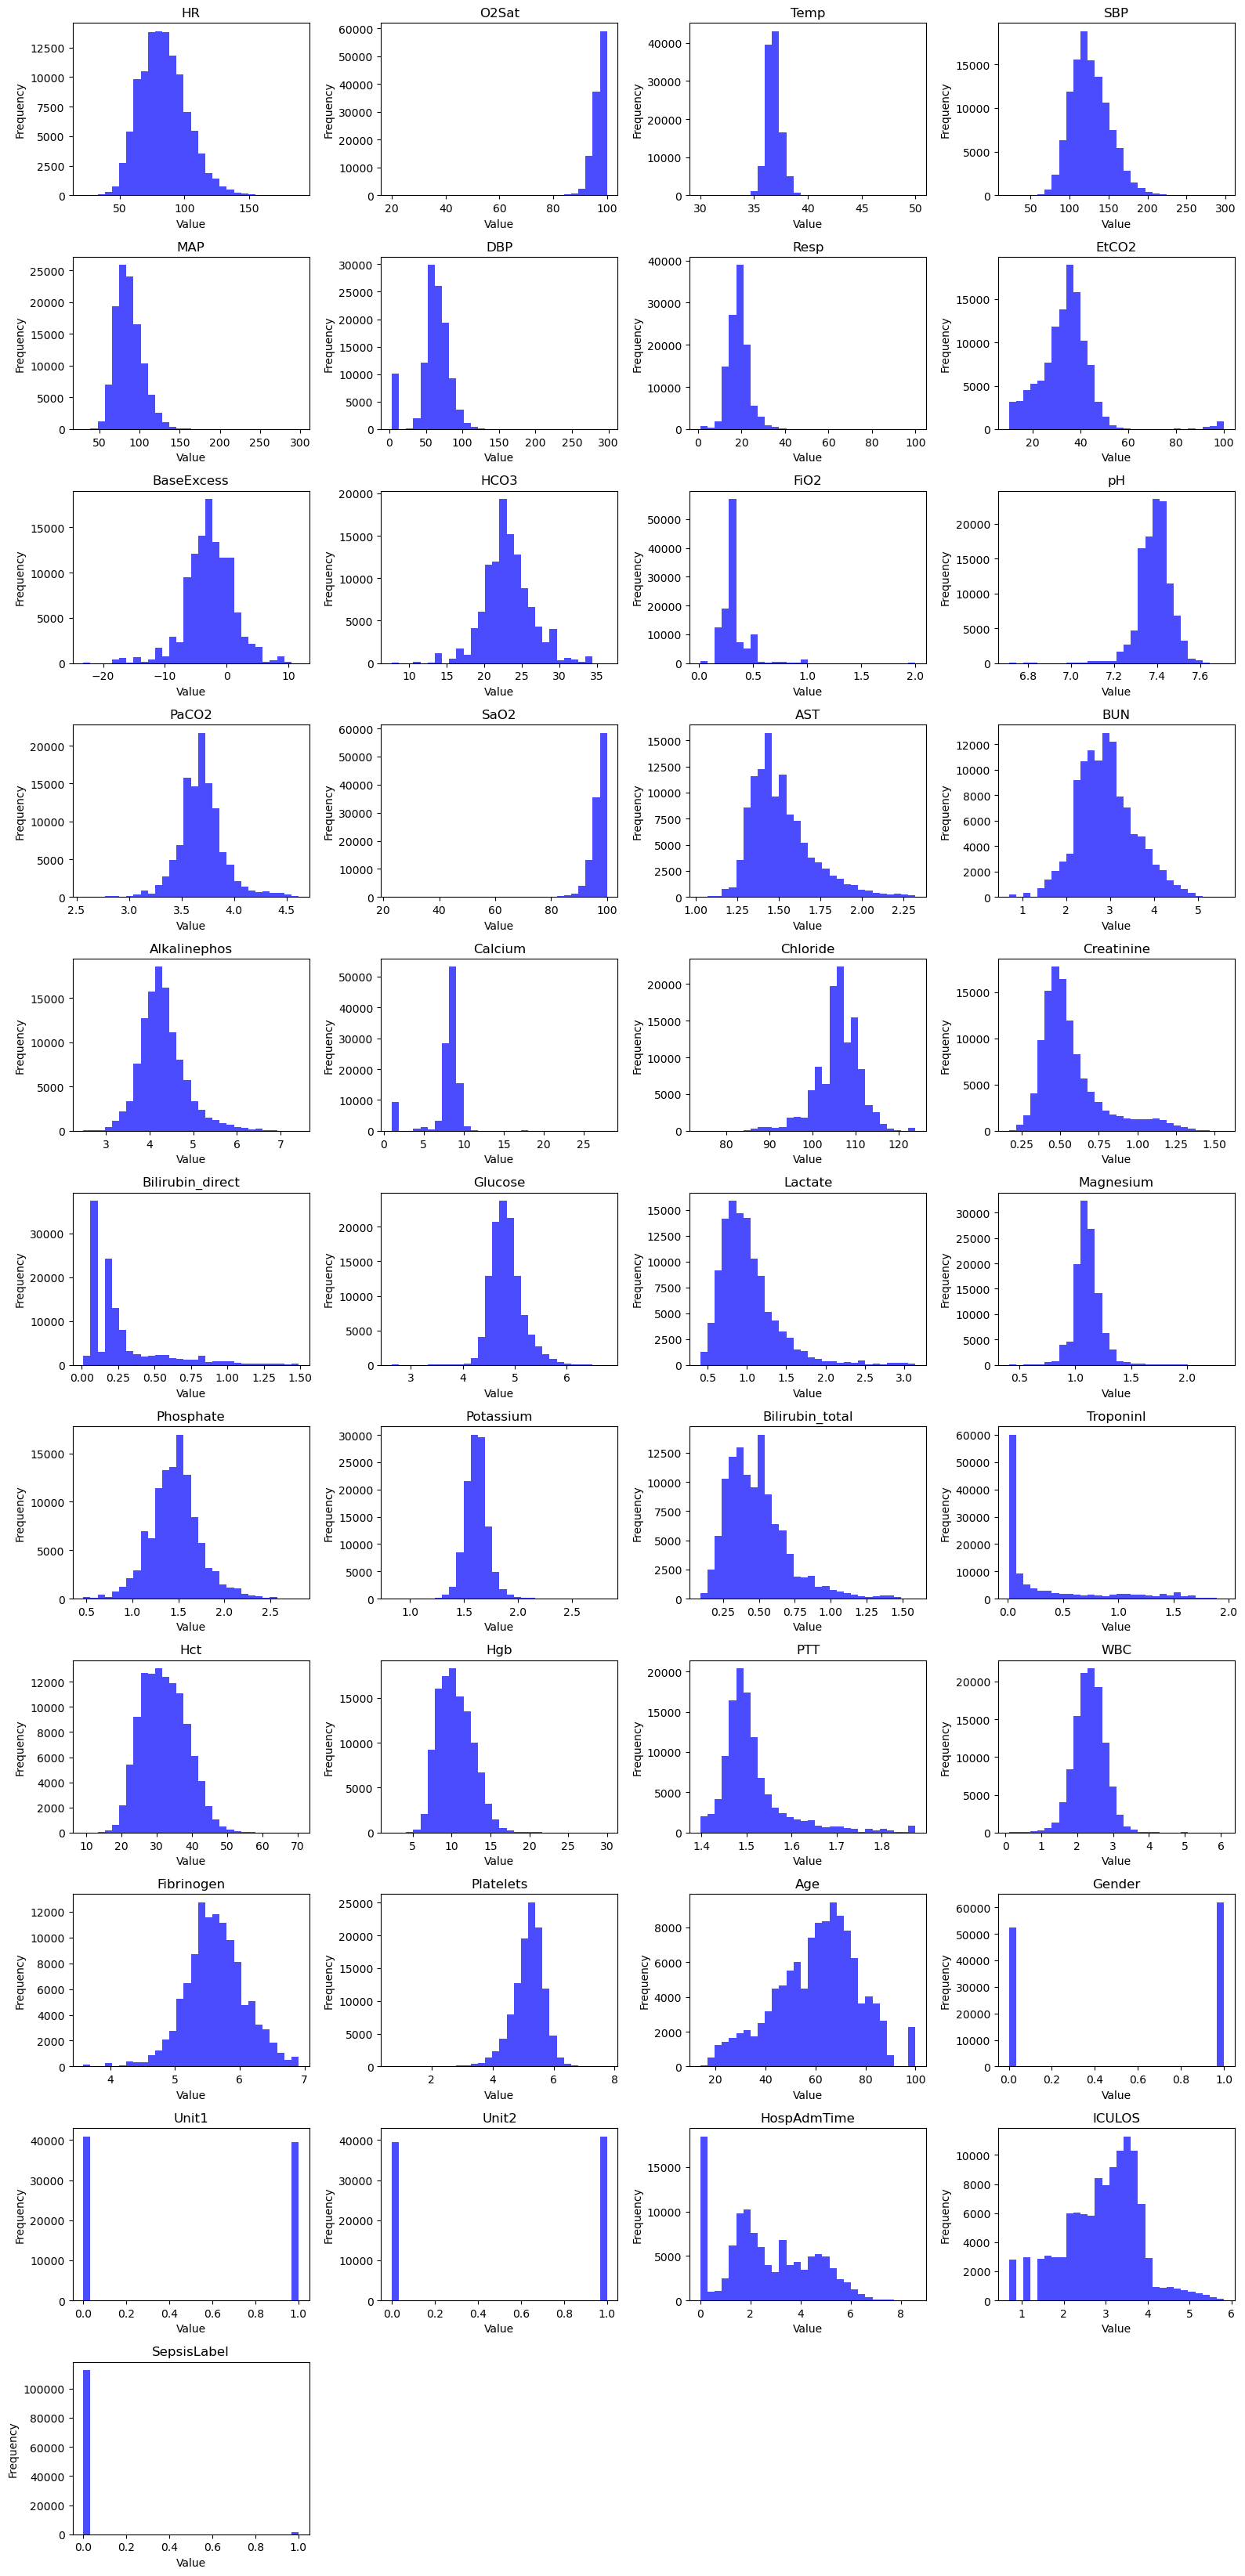

In [45]:
plot_dataset(test_set.columns, test_set, 4)

In [50]:
model_path = '/Users/gohitha/Desktop/CPSIL/sepsis-prediction/models/'

In [54]:
features, labels = feature_extract(test_set)

(114300, 68)


In [55]:
probs = load_model_predict(features, 5, model_path)

In [57]:
predlabels = [0 if i <= 0.5 else 1 for i in probs]

In [59]:
len(predlabels)

114300

In [60]:
len(labels)

114300

In [61]:
labels

array([0, 0, 0, ..., 1, 0, 0])

In [62]:
np.array(predlabels)

array([0, 0, 0, ..., 1, 1, 1])

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

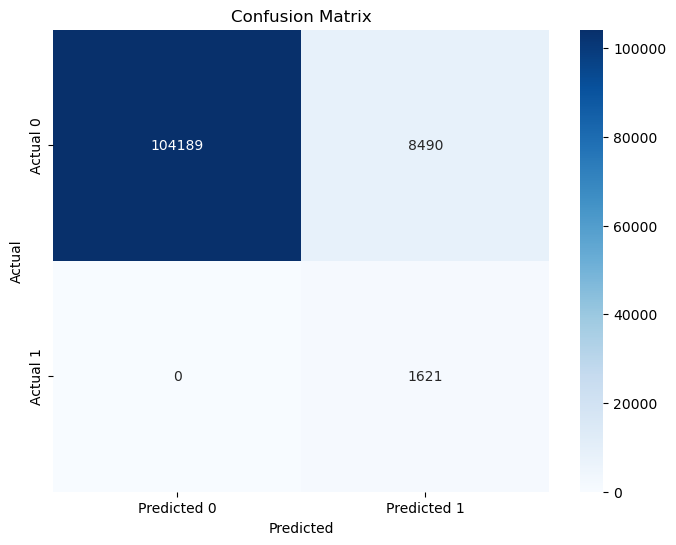

In [68]:
# Create the confusion matrix
cm = confusion_matrix(labels, predlabels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score

In [70]:
# Example data


# Calculate ROC AUC
roc_auc = roc_auc_score(labels, probs)

print(f"The ROC AUC score is: {roc_auc}")


The ROC AUC score is: 0.980746959725344


In [71]:
104189 / (104189 + 8490)

0.9246532184346684

In [72]:
(104189 + 1621) / (104189 + 8490 + 1621)

0.9257217847769029

In [73]:
from sklearn.metrics import precision_score, recall_score

In [74]:
precision = precision_score(labels, predlabels)
recall = recall_score(labels, predlabels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.1603204430817921
Recall: 1.0


In [75]:
labels

array([0, 0, 0, ..., 1, 0, 0])